## ***** Company, Telecom - Predicting and Reducing Customer Churn

In order to ensure a structured and effective approach, this study will be guided by the principles of the CRISP-DM methodology. This framework will guide the project through key phases, such as understanding the business context, data exploration, data preparation, model building, and evaluation, ensuring that each step aligns with both technical objectives and business needs.

<br>

## Business Understanding

Churn, or customer cancellation rate, is a critical challenge for telecommunications companies, which need to balance retaining existing customers with the high cost of acquiring new ones. According to Foster Provost and Tom Fawcett in Data Science for Business, predicting and mitigating churn through data analysis is crucial for ensuring a company's financial stability and market competitiveness (Provost & Fawcett, 2013).

Predictive analytics has emerged as a powerful tool to address this challenge. Eric Siegel, in Predictive Analytics, highlights that analyzing historical customer behavior patterns can forecast the risk of cancellation, enabling companies to take proactive actions such as personalized offers and service improvements (Siegel, 2013). In the telecommunications sector, where data usage is vast and diverse, accurately identifying churn signals can significantly enhance customer retention and overall satisfaction.

This study explores customer retention strategies in telecommunications, with a focus on applying machine learning models. As argued by Nick Mehta in Customer Success, adopting practices that ensure continuous customer satisfaction is key to reducing churn and fostering a more loyal and profitable customer base (Mehta, Steinman & Murphy, 2016).

<br>

## 1.0 Initialization

In [1]:
import numpy as np

import pandas as pd
pd.set_option('display.max_columns', 500)
import warnings
warnings.filterwarnings('ignore')

from scipy import stats as st

import math
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter
import textwrap
sns.set_theme(style="whitegrid")
import sklearn.metrics
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score
import sklearn.neighbors
import sklearn.preprocessing
from sklearn.preprocessing import MinMaxScaler
import sklearn.linear_model
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, roc_auc_score
from imblearn.over_sampling import SMOTE
from numpy.linalg import LinAlgError
from IPython.display import display
from catboost import CatBoostRegressor
from joblib import dump

<br>

## 2.0 Reading Files

#### 2.1 df_contract

In [2]:
df_contract = pd.read_csv('contract.csv')

In [3]:
df_contract.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65


In [4]:
df_contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


<br>

#### 2.2 df_personal

In [5]:
df_personal = pd.read_csv('personal.csv')

In [6]:
df_personal.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [7]:
df_personal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


<br>

#### 2.3 df_internet

In [8]:
df_internet = pd.read_csv('internet.csv')

In [9]:
df_internet.head()

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


In [10]:
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


<br>

#### 2.4 df_phone

In [11]:
df_phone = pd.read_csv('phone.csv')

In [12]:
df_phone.head()

,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


In [13]:
df_phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


During the data loading process, issues such as incorrect data types were observed in the dataframes. However, all necessary adjustments will be addressed in the preprocessing stage. This will include correcting data types, standardizing column names, handling duplicates, and addressing missing values.

<br>

## 3.0 Data Understanding

In [14]:
from functions import analyze_dataframe as analyzer

#### 3.1 df_contract

In [15]:
df_contract['customerID'].duplicated().sum()

0

In [16]:
analyzer.analyze_dataframe(df_contract, exclude_columns='customerID')


--- Categorical Columns Value Counts (with Percentages) ---

BeginDate (Top 10 of 77 total values):
            Count Percentage
BeginDate                   
2014-02-01    366      5.20%
2019-10-01    237      3.37%
2019-11-01    237      3.37%
2019-09-01    237      3.37%
2020-01-01    233      3.31%
2019-12-01    220      3.12%
2014-03-01    178      2.53%
2019-07-01    156      2.21%
2019-08-01    146      2.07%
2019-06-01    141      2.00%

EndDate (Top 10 of 5 total values):
                     Count Percentage
EndDate                              
No                    5174     73.46%
2019-11-01 00:00:00    485      6.89%
2019-12-01 00:00:00    466      6.62%
2020-01-01 00:00:00    460      6.53%
2019-10-01 00:00:00    458      6.50%

Type (Top 10 of 3 total values):
                Count Percentage
Type                            
Month-to-month   3875     55.02%
Two year         1695     24.07%
One year         1473     20.91%

PaperlessBilling (Top 10 of 2 total values):
   

TotalCharges column issues: TotalCharges is mistakenly treated as a categorical variable, with some values seemingly missing but represented as empty spaces. These should be addressed and converted to a numerical type.

In [17]:
# Check which values in the 'TotalCharges' column are not numeric
non_numeric_values = df_contract[~df_contract['TotalCharges'].apply(lambda x: x.replace('.', '', 1).isdigit())]

num_non_numeric = non_numeric_values.shape[0]
print(f"Number of non-numeric values in 'TotalCharges': {num_non_numeric}")

print("Non-numeric values in 'TotalCharges':")
print(non_numeric_values['TotalCharges'].unique())

Number of non-numeric values in 'TotalCharges': 11
Non-numeric values in 'TotalCharges':
[' ']


In [18]:
df_contract['TotalCharges'] = df_contract['TotalCharges'].replace(' ', np.nan)

After analyzing the available data, I identified a total of 7,043 unique customer IDs, with some currently active and others inactive.

Target column imbalance (EndDate): The majority of customers (73.46%) have no end date (EndDate = "No"), indicating active contracts. A binary column should be created to distinguish between active and inactive contracts.

Other observations: The MonthlyCharges column has a reasonable spread, and columns like Type, PaperlessBilling, and PaymentMethod show balanced distributions, though the month-to-month contract type is dominant (55%).

This analysis identifies necessary data cleaning steps and highlights key patterns to consider in the next stages.

<br>

#### 3.2 df_personal

In [19]:
df_personal['customerID'].duplicated().sum()

0

In [20]:
analyzer.analyze_dataframe(df_personal, exclude_columns='customerID')


--- Categorical Columns Value Counts (with Percentages) ---

gender (Top 10 of 2 total values):
        Count Percentage
gender                  
Male     3555     50.48%
Female   3488     49.52%

Partner (Top 10 of 2 total values):
         Count Percentage
Partner                  
No        3641     51.70%
Yes       3402     48.30%

Dependents (Top 10 of 2 total values):
            Count Percentage
Dependents                  
No           4933     70.04%
Yes          2110     29.96%

--- Numerical Columns Description ---
       SeniorCitizen
count    7043.000000
mean        0.162147
std         0.368612
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000

--- Date Columns Range ---


In [21]:
df_personal['SeniorCitizen'].unique()

array([0, 1], dtype=int64)

The data analysis shows that the gender column is well-balanced, with 50.48% male and 49.52% female. The numerical columns, such as SeniorCitizen, Partner, and Dependents, represent binary data, where 0 and 1 correspond to "no" and "yes," respectively. The frequency of each category can be observed through the mean values. For instance, the mean of 0.16 in the SeniorCitizen column indicates that only 16% of customers are senior citizens, while 48% have a partner (Partner), and about 30% have dependents (Dependents).

<br>

#### 3.3 df_internet

In [22]:
df_internet['customerID'].duplicated().sum()

0

In [23]:
analyzer.analyze_dataframe(df_internet, exclude_columns='customerID')


--- Categorical Columns Value Counts (with Percentages) ---

InternetService (Top 10 of 2 total values):
                 Count Percentage
InternetService                  
Fiber optic       3096     56.12%
DSL               2421     43.88%

OnlineSecurity (Top 10 of 2 total values):
                Count Percentage
OnlineSecurity                  
No               3498     63.40%
Yes              2019     36.60%

OnlineBackup (Top 10 of 2 total values):
              Count Percentage
OnlineBackup                  
No             3088     55.97%
Yes            2429     44.03%

DeviceProtection (Top 10 of 2 total values):
                  Count Percentage
DeviceProtection                  
No                 3095     56.10%
Yes                2422     43.90%

TechSupport (Top 10 of 2 total values):
             Count Percentage
TechSupport                  
No            3473     62.95%
Yes           2044     37.05%

StreamingTV (Top 10 of 2 total values):
             Count Percentag

The analysis of the InternetService column shows that the majority of customers use fiber optic (56.12%), while 43.88% have DSL. The other numerical columns represent binary data, where 0 indicates "no" and 1 indicates "yes" for services such as OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, and StreamingMovies. The frequency of these services can be observed through the mean values: about 37% of customers use technical support (TechSupport), 44% have online backup (OnlineBackup), and approximately 49% use TV and movie streaming services.

<br>

#### 3.4 df_phone

In [24]:
df_phone['customerID'].duplicated().sum()

0

In [25]:
analyzer.analyze_dataframe(df_phone, exclude_columns='customerID')


--- Categorical Columns Value Counts (with Percentages) ---

MultipleLines (Top 10 of 2 total values):
               Count Percentage
MultipleLines                  
No              3390     53.29%
Yes             2971     46.71%

--- Numerical Columns Description ---

--- Date Columns Range ---


The MultipleLines column represents binary data, where 0 indicates the customer does not have multiple lines, and 1 indicates they do. The frequency of this data can be observed through the mean of 0.47, showing that approximately 47% of customers have multiple phone lines.

<br>

## 4.0 Data Preprocessing 

#### 4.1 Data Type Adjustments


df_contract: To optimize data handling and performance, key columns were adjusted. BeginDate and EndDate were converted to datetime for date calculations, with invalid EndDate values like "No" handled as NaT for active contracts. Categorical columns like Type and PaymentMethod were changed to category to reduce memory usage. The binary PaperlessBilling column was converted to 1 and 0 for easier analysis. Finally, TotalCharges was converted to float64 after addressing non-numeric values.

In [26]:
# Changes in df_contract

datetime_columns = ['BeginDate', 'EndDate']
df_contract[datetime_columns] = df_contract[datetime_columns].apply(pd.to_datetime, errors='coerce')

category_columns = ['Type', 'PaymentMethod']
df_contract[category_columns] = df_contract[category_columns].astype('category')

df_contract['PaperlessBilling'] = df_contract['PaperlessBilling'].map({'Yes': 1, 'No': 0})

df_contract['TotalCharges'] = pd.to_numeric(df_contract['TotalCharges'], errors='coerce')

In [27]:
df_contract.head(3)

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,NaT,Month-to-month,1,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,NaT,One year,0,Mailed check,56.95,1889.50
2,3668-QPYBK,2019-10-01,2019-12-01,Month-to-month,1,Mailed check,53.85,108.15


In [28]:
df_contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           1869 non-null   datetime64[ns]
 3   Type              7043 non-null   category      
 4   PaperlessBilling  7043 non-null   int64         
 5   PaymentMethod     7043 non-null   category      
 6   MonthlyCharges    7043 non-null   float64       
 7   TotalCharges      7032 non-null   float64       
dtypes: category(2), datetime64[ns](2), float64(2), int64(1), object(1)
memory usage: 344.4+ KB


df_personal: To optimize data handling and performance, the gender column was converted to category to reduce memory usage. The binary columns Partner and Dependents were transformed to 1 for "Yes" and 0 for "No", enabling easier numerical analysis. The customerID column remained as object since it's a unique identifier, and the SeniorCitizen column, already numerical, required no changes.

In [29]:
# Changes in df_personal

df_personal['gender'] = df_personal['gender'].astype('category')

binary_columns = ['Partner', 'Dependents']
df_personal[binary_columns] = df_personal[binary_columns].replace({'Yes': 1, 'No': 0})

In [30]:
df_personal.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,1,0
1,5575-GNVDE,Male,0,0,0
2,3668-QPYBK,Male,0,0,0


In [31]:
df_personal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   customerID     7043 non-null   object  
 1   gender         7043 non-null   category
 2   SeniorCitizen  7043 non-null   int64   
 3   Partner        7043 non-null   int64   
 4   Dependents     7043 non-null   int64   
dtypes: category(1), int64(3), object(1)
memory usage: 227.2+ KB


df_internet: To optimize data handling and performance, several columns were adjusted. The binary columns (OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies) were converted from "Yes"/"No" to 1/0 for easier numerical analysis. The InternetService column, which likely contains a limited set of values (e.g., "DSL", "Fiber optic", "No"), was converted to category to reduce memory usage. The customerID column remained as object since it serves as a unique identifier.

In [32]:
# Changes in df_internet

binary_columns = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
df_internet[binary_columns] = df_internet[binary_columns].replace({'Yes': 1, 'No': 0})

df_internet['InternetService'] = df_internet['InternetService'].astype('category')

In [33]:
df_internet.head(3)

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,0,1,0,0,0,0
1,5575-GNVDE,DSL,1,0,1,0,0,0
2,3668-QPYBK,DSL,1,1,0,0,0,0


In [34]:
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        5517 non-null   object  
 1   InternetService   5517 non-null   category
 2   OnlineSecurity    5517 non-null   int64   
 3   OnlineBackup      5517 non-null   int64   
 4   DeviceProtection  5517 non-null   int64   
 5   TechSupport       5517 non-null   int64   
 6   StreamingTV       5517 non-null   int64   
 7   StreamingMovies   5517 non-null   int64   
dtypes: category(1), int64(6), object(1)
memory usage: 307.3+ KB


df_fone: To optimize data handling and performance, the MultipleLines column, which contains binary values ("Yes", "No", "No phone service"), was converted to numerical format where 1 represents "Yes" and 0 represents "No". The No phone service value can be handled separately, based on the specific analysis needs. The customerID column remains as object since it serves as a unique identifier.

In [35]:
# Changes in df_phone

df_phone['MultipleLines'] = df_phone['MultipleLines'].replace({'Yes': 1, 'No': 0})

In [36]:
df_phone.head(3)

,customerID,MultipleLines
0,5575-GNVDE,0
1,3668-QPYBK,0
2,9237-HQITU,0


In [37]:
df_phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 99.5+ KB


<br>

#### 4.2 Column and Data Formatting

In [38]:
from functions import format_column_names_and_data as formater

In [39]:
df_contract, df_personal, df_internet, df_phone = formater.format_column_names_and_data(df_contract, df_personal, df_internet, df_phone)

In [40]:
df_contract.head(3)

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges
0,7590_vhveg,2020-01-01,NaT,month_to_month,1,electronic_check,29.85,29.85
1,5575_gnvde,2017-04-01,NaT,one_year,0,mailed_check,56.95,1889.50
2,3668_qpybk,2019-10-01,2019-12-01,month_to_month,1,mailed_check,53.85,108.15


In [41]:
df_personal.head(3)

,customer_id,gender,senior_citizen,partner,dependents
0,7590_vhveg,female,0,1,0
1,5575_gnvde,male,0,0,0
2,3668_qpybk,male,0,0,0


In [42]:
df_internet.head(3)

,customer_id,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies
0,7590_vhveg,dsl,0,1,0,0,0,0
1,5575_gnvde,dsl,1,0,1,0,0,0
2,3668_qpybk,dsl,1,1,0,0,0,0


In [43]:
df_phone.head(3)

,customer_id,multiple_lines
0,5575_gnvde,0
1,3668_qpybk,0
2,9237_hqitu,0


<br>

#### 4.3 Data Merging and Feature Engineering

##### 4.3.1 Data Merging

To merge the four DataFrames, I will use the left join method with the df_contract DataFrame as the base, ensuring that all rows from this DataFrame are preserved. I will incorporate the corresponding data from the other three DataFrames (df_internet, df_phone, df_personal) based on the customerID key.

With this, I will have a consolidated DataFrame (df_merged) containing all the necessary information for the next steps.

I will add two new columns to the df_internet and df_phone DataFrames, with the aim of improving the model's understanding of the services contracted. In df_internet, the internet_service column will be filled with the value 1, indicating that all customers in this DataFrame have internet service, and in df_phone, the phone_service column will be filled with the value 1, indicating that all customers have phone service. The new columns will be positioned right after the user_id column in both DataFrames. After the merge process, any resulting missing values will be filled with 0, indicating that customers not present in each DataFrame do not have the corresponding service, helping the model to distinguish between the services contracted.

In [44]:
col_index_internet = df_internet.columns.get_loc('customer_id') + 1
df_internet.insert(col_index_internet, 'internet', 1)

col_index_phone = df_phone.columns.get_loc('customer_id') + 1
df_phone.insert(col_index_phone, 'phone', 1)

In [45]:
df_merged = df_contract.merge(df_personal, on='customer_id', how='left') \
                       .merge(df_phone, on='customer_id', how='left') \
                       .merge(df_internet, on='customer_id', how='left')

In [46]:
df_merged

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,gender,senior_citizen,partner,dependents,phone,multiple_lines,internet,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies
0,7590_vhveg,2020-01-01,NaT,month_to_month,1,electronic_check,29.85,29.85,female,0,1,0,NaN,NaN,1.0,dsl,0.0,1.0,0.0,0.0,0.0,0.0
1,5575_gnvde,2017-04-01,NaT,one_year,0,mailed_check,56.95,1889.50,male,0,0,0,1.0,0.0,1.0,dsl,1.0,0.0,1.0,0.0,0.0,0.0
2,3668_qpybk,2019-10-01,2019-12-01,month_to_month,1,mailed_check,53.85,108.15,male,0,0,0,1.0,0.0,1.0,dsl,1.0,1.0,0.0,0.0,0.0,0.0
3,7795_cfocw,2016-05-01,NaT,one_year,0,bank_transfer_automatic,42.30,1840.75,male,0,0,0,NaN,NaN,1.0,dsl,1.0,0.0,1.0,1.0,0.0,0.0
4,9237_hqitu,2019-09-01,2019-11-01,month_to_month,1,electronic_check,70.70,151.65,female,0,0,0,1.0,0.0,1.0,fiber_optic,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840_resvb,2018-02-01,NaT,one_year,1,mailed_check,84.80,1990.50,male,0,1,1,1.0,1.0,1.0,dsl,1.0,0.0,1.0,1.0,1.0,1.0
7039,2234_xaduh,2014-02-01,NaT,one_year,1,credit_card_automatic,103.20,7362.90,female,0,1,1,1.0,1.0,1.0,fiber_optic,0.0,1.0,1.0,0.0,1.0,1.0
7040,4801_jzazl,2019-03-01,NaT,month_to_month,1,electronic_check,29.60,346.45,female,0,1,1,NaN,NaN,1.0,dsl,1.0,0.0,0.0,0.0,0.0,0.0
7041,8361_ltmkd,2019-07-01,2019-11-01,month_to_month,1,mailed_check,74.40,306.60,male,1,1,0,1.0,1.0,1.0,fiber_optic,0.0,0.0,0.0,0.0,0.0,0.0


<br>

##### 4.3.2 Feature Engineering

When creating the churn column, I use the end_date column as a reference. The goal is to mark whether a customer has canceled the service or not. If the end_date column contains a date (indicating that the customer terminated the contract), I assign the value 1. Otherwise, when the value is missing (NaT), it means the customer is still active, and I assign the value 0.

In [47]:
df_merged['churn'] = df_merged['end_date'].apply(lambda x: 1 if pd.notna(x) else 0)

In [48]:
df_merged.head(3)

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,gender,senior_citizen,partner,dependents,phone,multiple_lines,internet,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,churn
0,7590_vhveg,2020-01-01,NaT,month_to_month,1,electronic_check,29.85,29.85,female,0,1,0,NaN,NaN,1.0,dsl,0.0,1.0,0.0,0.0,0.0,0.0,0
1,5575_gnvde,2017-04-01,NaT,one_year,0,mailed_check,56.95,1889.50,male,0,0,0,1.0,0.0,1.0,dsl,1.0,0.0,1.0,0.0,0.0,0.0,0
2,3668_qpybk,2019-10-01,2019-12-01,month_to_month,1,mailed_check,53.85,108.15,male,0,0,0,1.0,0.0,1.0,dsl,1.0,1.0,0.0,0.0,0.0,0.0,1


I will create a fictional current date (2020-02-02) to ensure it is more relevant and consistent with the dates already present in the data. If it were certain that the data is up to date, I would use the pd.Timestamp.now() function to get the real current date.

This new column will help us identify a pattern for the average duration of service usage before cancellations. It will be used to calculate the difference between the contract start dates and the cancellation date, enabling the analysis of the average service usage time.

In [49]:
df_merged['begin_date'].max()

Timestamp('2020-02-01 00:00:00')

In [50]:
df_merged['end_date'].max()

Timestamp('2020-01-01 00:00:00')

In [51]:
current_date = pd.Timestamp('2020-02-02 00:00:00')

col_index = df_merged.columns.get_loc('end_date') + 1 

df_merged.insert(col_index, 'current_date', current_date)

In [52]:
df_merged.head(3)

,customer_id,begin_date,end_date,current_date,type,paperless_billing,payment_method,monthly_charges,total_charges,gender,senior_citizen,partner,dependents,phone,multiple_lines,internet,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,churn
0,7590_vhveg,2020-01-01,NaT,2020-02-02,month_to_month,1,electronic_check,29.85,29.85,female,0,1,0,NaN,NaN,1.0,dsl,0.0,1.0,0.0,0.0,0.0,0.0,0
1,5575_gnvde,2017-04-01,NaT,2020-02-02,one_year,0,mailed_check,56.95,1889.50,male,0,0,0,1.0,0.0,1.0,dsl,1.0,0.0,1.0,0.0,0.0,0.0,0
2,3668_qpybk,2019-10-01,2019-12-01,2020-02-02,month_to_month,1,mailed_check,53.85,108.15,male,0,0,0,1.0,0.0,1.0,dsl,1.0,1.0,0.0,0.0,0.0,0.0,1


In [53]:
df_merged['contract_duration'] = df_merged.apply(
    lambda row: (row['end_date'] if pd.notna(row['end_date']) else row['current_date']) - row['begin_date'],
    axis=1
).dt.days

contract_duration = df_merged.pop('contract_duration')

col_index = df_merged.columns.get_loc('current_date') + 1

df_merged.insert(col_index, 'contract_duration', contract_duration)

In [54]:
df_merged.head(3)

,customer_id,begin_date,end_date,current_date,contract_duration,type,paperless_billing,payment_method,monthly_charges,total_charges,gender,senior_citizen,partner,dependents,phone,multiple_lines,internet,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,churn
0,7590_vhveg,2020-01-01,NaT,2020-02-02,32,month_to_month,1,electronic_check,29.85,29.85,female,0,1,0,NaN,NaN,1.0,dsl,0.0,1.0,0.0,0.0,0.0,0.0,0
1,5575_gnvde,2017-04-01,NaT,2020-02-02,1037,one_year,0,mailed_check,56.95,1889.50,male,0,0,0,1.0,0.0,1.0,dsl,1.0,0.0,1.0,0.0,0.0,0.0,0
2,3668_qpybk,2019-10-01,2019-12-01,2020-02-02,61,month_to_month,1,mailed_check,53.85,108.15,male,0,0,0,1.0,0.0,1.0,dsl,1.0,1.0,0.0,0.0,0.0,0.0,1


A new DataFrame will be created containing the start dates (begin_date) and cancellation dates (end_date) of the contracts to perform a specific temporal analysis of the distribution of new contracts and cancellations over time. This will allow the observation of monthly and yearly patterns related to churn behavior and new subscriptions, providing valuable insights into seasonality or cancellation trends. In the DataFrame that will be used for the churn prediction model, only the contract duration information will be kept, as it is an aggregated and direct metric, sufficient for modeling without overloading the dataset with date-related information.

In [55]:
df_dates = df_merged[['customer_id', 'begin_date', 'end_date']]

df_dates['begin_date'] = df_dates['begin_date'].dt.to_period('M')
df_dates['end_date'] = df_dates['end_date'].dt.to_period('M')

In [56]:
df_dates.head(3)

,customer_id,begin_date,end_date
0,7590_vhveg,2020-01,NaT
1,5575_gnvde,2017-04,NaT
2,3668_qpybk,2019-10,2019-12


In [57]:
df_dates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype    
---  ------       --------------  -----    
 0   customer_id  7043 non-null   object   
 1   begin_date   7043 non-null   period[M]
 2   end_date     1869 non-null   period[M]
dtypes: object(1), period[M](2)
memory usage: 165.2+ KB


I will exclude the begin_date, end_date, and current_date columns because the relevant information about contract duration has already been encapsulated in the contract_duration column. The principle behind this exclusion is data simplification: instead of keeping multiple columns with date values, I use the contract_duration column to represent the contract duration in a numerical format, which is more suitable for training machine learning models.

The contract_duration column contains the difference in days between the start and end dates (or the current date for active contracts). This eliminates the need to work with datetime data since the temporal information has been converted into a numerical feature that can be directly used by the models.

In [58]:
df = df_merged.drop(columns=['begin_date', 'end_date', 'current_date'])

In [59]:
df.head(3)

,customer_id,contract_duration,type,paperless_billing,payment_method,monthly_charges,total_charges,gender,senior_citizen,partner,dependents,phone,multiple_lines,internet,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,churn
0,7590_vhveg,32,month_to_month,1,electronic_check,29.85,29.85,female,0,1,0,NaN,NaN,1.0,dsl,0.0,1.0,0.0,0.0,0.0,0.0,0
1,5575_gnvde,1037,one_year,0,mailed_check,56.95,1889.50,male,0,0,0,1.0,0.0,1.0,dsl,1.0,0.0,1.0,0.0,0.0,0.0,0
2,3668_qpybk,61,month_to_month,1,mailed_check,53.85,108.15,male,0,0,0,1.0,0.0,1.0,dsl,1.0,1.0,0.0,0.0,0.0,0.0,1


A column avg_charge_per_duration will be created, representing the average monthly charge for each customer, calculated by dividing total_charges by the contract duration. This metric can help identify customers with higher charges, who may have a higher likelihood of churn, providing the model with a useful indicator of customer behavior regarding monthly costs.

In [60]:
df['avg_charge_per_duration'] = df['total_charges'] / df['contract_duration']

col_index = df.columns.get_loc('total_charges') + 1

df.insert(col_index, 'avg_charge_per_duration', df.pop('avg_charge_per_duration'))

In [61]:
df.head(3)

,customer_id,contract_duration,type,paperless_billing,payment_method,monthly_charges,total_charges,avg_charge_per_duration,gender,senior_citizen,partner,dependents,phone,multiple_lines,internet,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,churn
0,7590_vhveg,32,month_to_month,1,electronic_check,29.85,29.85,0.932813,female,0,1,0,NaN,NaN,1.0,dsl,0.0,1.0,0.0,0.0,0.0,0.0,0
1,5575_gnvde,1037,one_year,0,mailed_check,56.95,1889.50,1.822083,male,0,0,0,1.0,0.0,1.0,dsl,1.0,0.0,1.0,0.0,0.0,0.0,0
2,3668_qpybk,61,month_to_month,1,mailed_check,53.85,108.15,1.772951,male,0,0,0,1.0,0.0,1.0,dsl,1.0,1.0,0.0,0.0,0.0,0.0,1


<br>

#### 4.4 Handling Duplicates and Missing Values

In [62]:
from functions import check_duplicates_and_missing_values as checker

In [63]:
checker.check_duplicates_and_missing_values(df,target_column='churn')

Class balance in the target column 'churn':
       Count Percentage
churn                  
0       5174     73.46%
1       1869     26.54%


No duplicate rows found.

No duplicate rows found by target column 'churn'.


Missing values per column and percentage:
                         Missing Values Percentage
total_charges                        11      0.16%
avg_charge_per_duration              11      0.16%
phone                               682      9.68%
multiple_lines                      682      9.68%
internet                           1526     21.67%
internet_service                   1526     21.67%
online_security                    1526     21.67%
online_backup                      1526     21.67%
device_protection                  1526     21.67%
tech_support                       1526     21.67%
streaming_tv                       1526     21.67%
streaming_movies                   1526     21.67%

Missing values percentages per 'churn':

For churn = 0:
                  

For handling missing values, rows in the total_charges column with null values will be removed due to the low number of cases, preventing any significant impact on the analysis. In the other columns, missing values indicate that the customer did not subscribe to the respective service, so these values will be filled with 0, representing the absence of the service. In the internet_service column, missing values will be filled with the string 'no_internet', indicating that the customer does not have internet service. This approach ensures that the model correctly interprets the absence of certain services while preserving data integrity.

In [64]:
df = df.dropna(subset=['total_charges'])

cols_to_fill_zero = [
    'phone', 'multiple_lines','internet', 'online_security', 'online_backup', 
    'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies'
]

df[cols_to_fill_zero] = df[cols_to_fill_zero].fillna(0)

df['internet_service'] = df['internet_service'].cat.add_categories('no_internet').fillna('no_internet')


In [65]:
df.isna().mean()

customer_id                0.0
contract_duration          0.0
type                       0.0
paperless_billing          0.0
payment_method             0.0
monthly_charges            0.0
total_charges              0.0
avg_charge_per_duration    0.0
gender                     0.0
senior_citizen             0.0
partner                    0.0
dependents                 0.0
phone                      0.0
multiple_lines             0.0
internet                   0.0
internet_service           0.0
online_security            0.0
online_backup              0.0
device_protection          0.0
tech_support               0.0
streaming_tv               0.0
streaming_movies           0.0
churn                      0.0
dtype: float64

In [66]:
df.duplicated().sum()

0

In [67]:
df.reset_index(drop=True, inplace=True)

In [68]:
df

,customer_id,contract_duration,type,paperless_billing,payment_method,monthly_charges,total_charges,avg_charge_per_duration,gender,senior_citizen,partner,dependents,phone,multiple_lines,internet,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,churn
0,7590_vhveg,32,month_to_month,1,electronic_check,29.85,29.85,0.932813,female,0,1,0,0.0,0.0,1.0,dsl,0.0,1.0,0.0,0.0,0.0,0.0,0
1,5575_gnvde,1037,one_year,0,mailed_check,56.95,1889.50,1.822083,male,0,0,0,1.0,0.0,1.0,dsl,1.0,0.0,1.0,0.0,0.0,0.0,0
2,3668_qpybk,61,month_to_month,1,mailed_check,53.85,108.15,1.772951,male,0,0,0,1.0,0.0,1.0,dsl,1.0,1.0,0.0,0.0,0.0,0.0,1
3,7795_cfocw,1372,one_year,0,bank_transfer_automatic,42.30,1840.75,1.341655,male,0,0,0,0.0,0.0,1.0,dsl,1.0,0.0,1.0,1.0,0.0,0.0,0
4,9237_hqitu,61,month_to_month,1,electronic_check,70.70,151.65,2.486066,female,0,0,0,1.0,0.0,1.0,fiber_optic,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,6840_resvb,731,one_year,1,mailed_check,84.80,1990.50,2.722982,male,0,1,1,1.0,1.0,1.0,dsl,1.0,0.0,1.0,1.0,1.0,1.0,0
7028,2234_xaduh,2192,one_year,1,credit_card_automatic,103.20,7362.90,3.358987,female,0,1,1,1.0,1.0,1.0,fiber_optic,0.0,1.0,1.0,0.0,1.0,1.0,0
7029,4801_jzazl,338,month_to_month,1,electronic_check,29.60,346.45,1.025000,female,0,1,1,0.0,0.0,1.0,dsl,1.0,0.0,0.0,0.0,0.0,0.0,0
7030,8361_ltmkd,123,month_to_month,1,mailed_check,74.40,306.60,2.492683,male,1,1,0,1.0,1.0,1.0,fiber_optic,0.0,0.0,0.0,0.0,0.0,0.0,1


<br>

## 5.0 EDA

During the Exploratory Data Analysis (EDA) phase, the primary goal is to identify patterns, relationships, and characteristics that might influence customer churn behavior. Through visualizations and descriptive statistics, the intent is to understand data distribution and check for imbalances across different categories.

EDA also facilitates the comparison between the overall proportion of active customers and churned customers with the proportions observed within specific subgroups. This comparison is crucial to verify whether certain features have a significant impact on churn or if they simply reflect the overall churn rate.

Moreover, the analysis explores potential correlations between numerical variables, aiming to identify factors that might affect contract duration or lead to cancellation decisions. Detailed analysis of aggregated metrics and the creation of derived variables help build a more robust predictive model, capable of capturing the main drivers of churn.

<br>

#### New Contracts and Cancellations Distribution:

The chart below shows the distribution of new contracts and cancellations by month and year. The blue bars represent new contracts, while the orange bars show cancellations. This visualization allows for a clear identification of periods with high customer acquisition and the months where contract cancellations occurred.

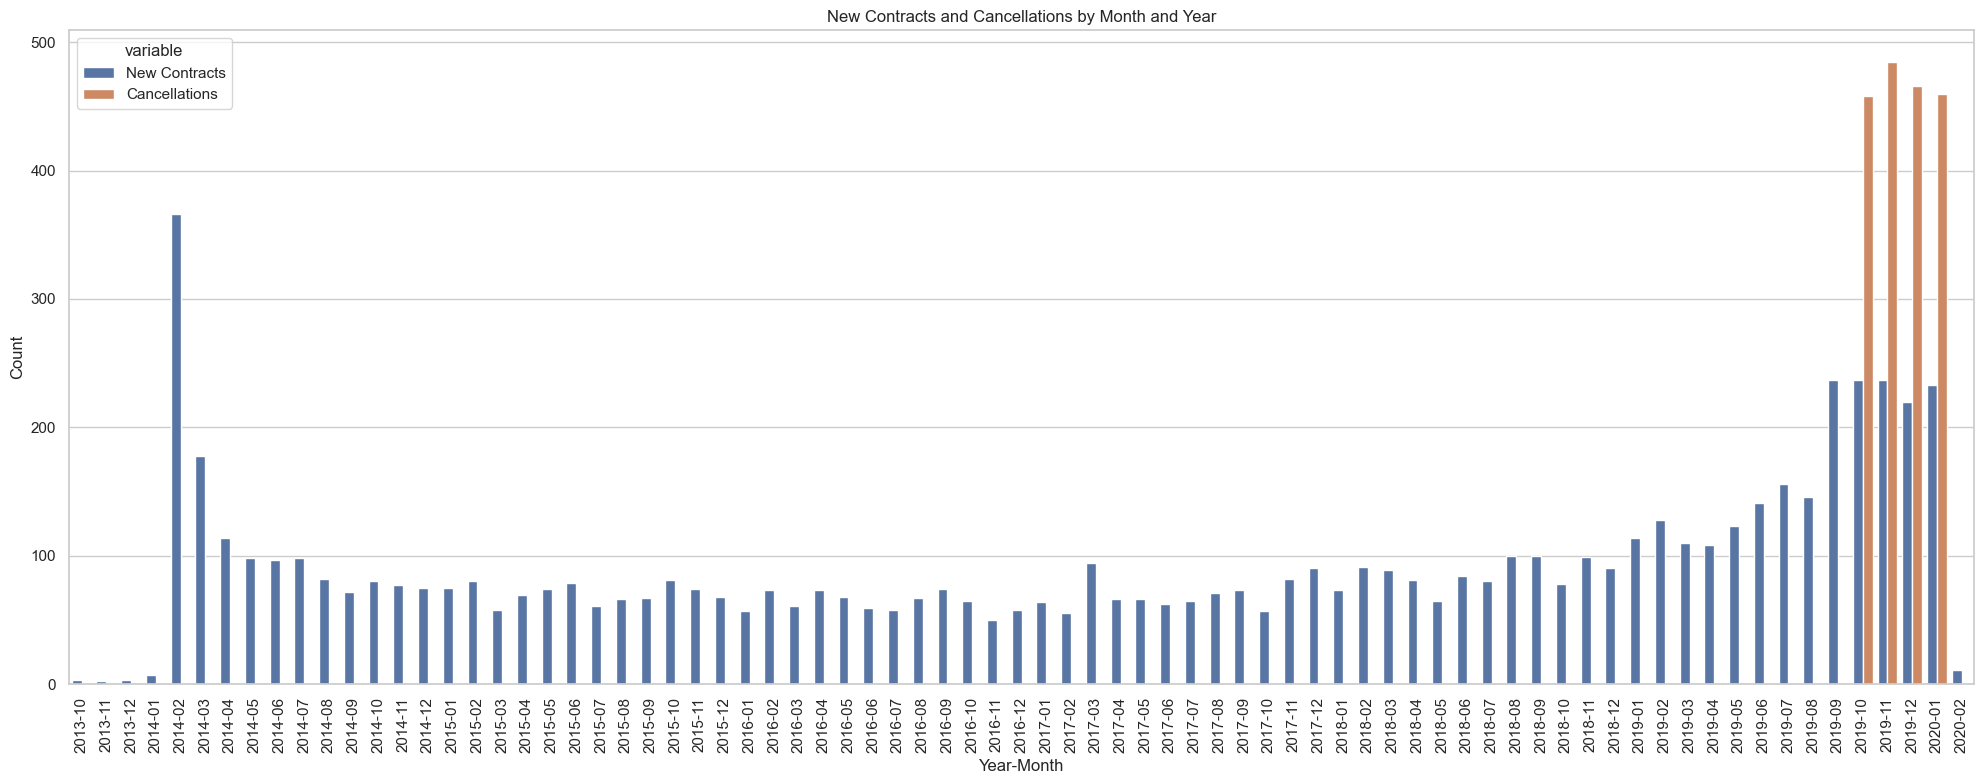

In [69]:
new_contracts = df_dates['begin_date'].value_counts().sort_index()
cancellations = df_dates['end_date'].value_counts().sort_index()

hist_data = pd.DataFrame({
    'New Contracts': new_contracts,
    'Cancellations': cancellations
}).fillna(0)  

plt.figure(figsize=(20, 8));

hist_data_melted = hist_data.reset_index().melt(id_vars='index', value_vars=['New Contracts', 'Cancellations'])

sns.barplot(data=hist_data_melted, x='index', y='value', hue='variable')

plt.title('New Contracts and Cancellations by Month and Year')
plt.xlabel('Year-Month')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()


From the chart, we can observe that cancellations begin in October 2019 (represented by the orange bars), while new contracts have been steadily increasing over the years. Although cancellations are concentrated in just a few months, this already raises a warning for the company. If this trend continues, it could pose a significant risk to business sustainability, as maintaining the customer base may become a challenge. This study is crucial to understand the causes of this behavior and to develop retention strategies that prevent an increase in churn, ensuring the company's continuity and growth.

<br>

#### Churn, Contract Duration and Churn by Contract Type:

The chart below provides a visual analysis of churn, comparing the number of active and churned customers, contract duration, and contract type. Each graph is segmented by customers who remain (churn 0) and those who have churned (churn 1).

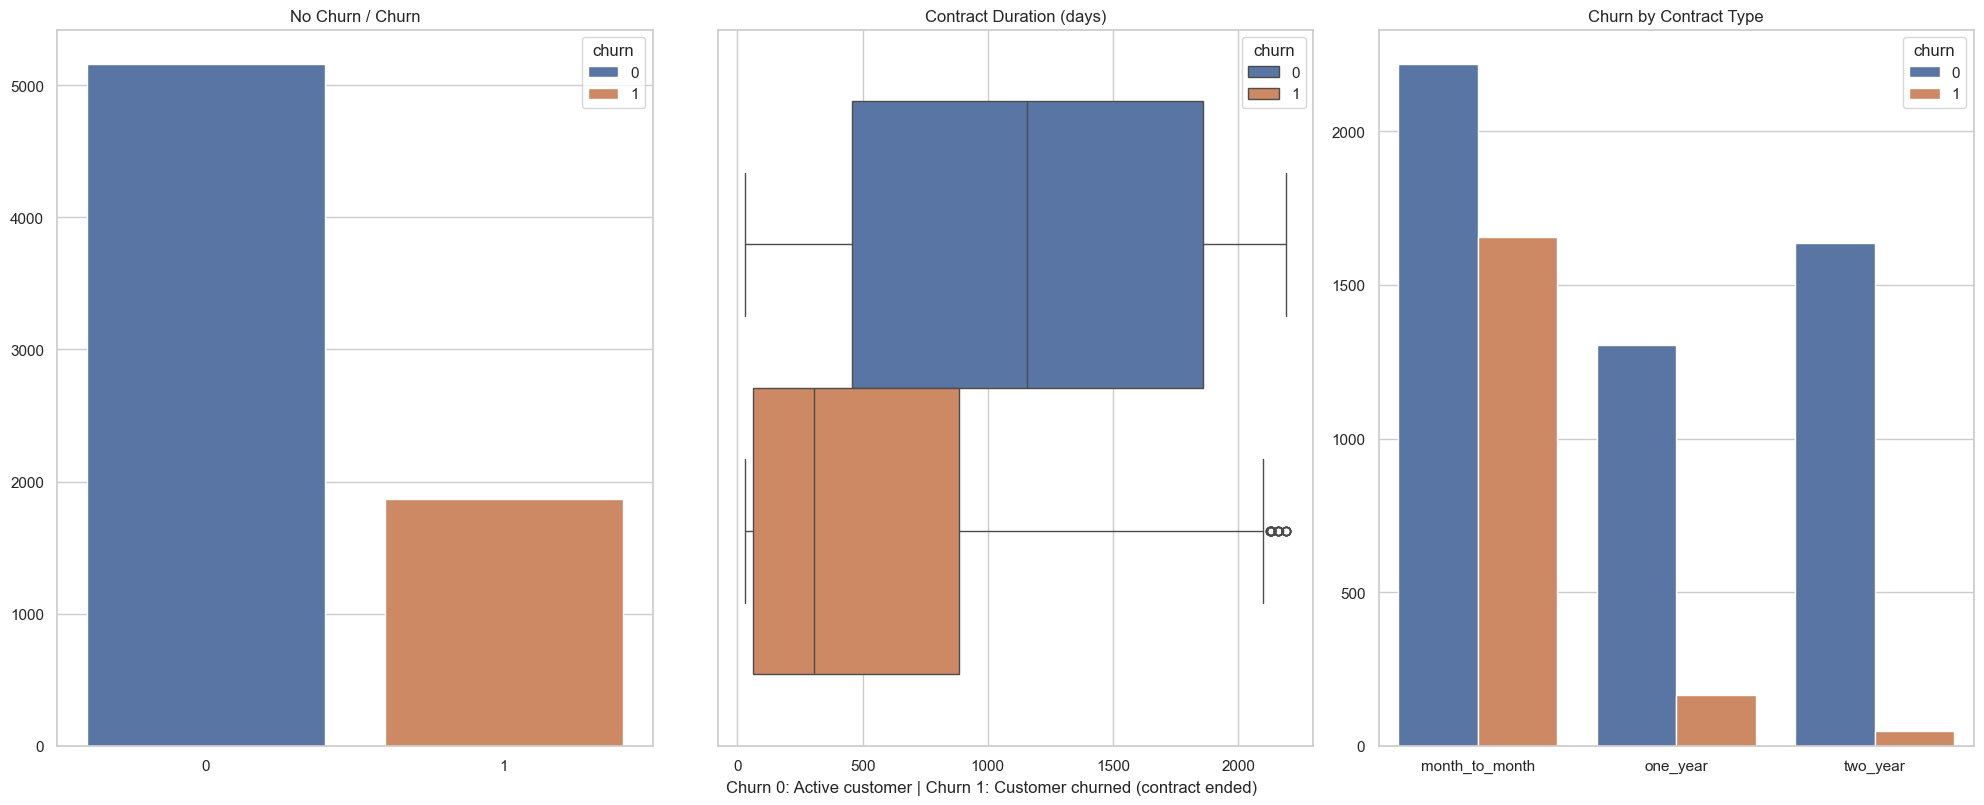

In [70]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 8))

sns.countplot(hue = 'churn', hue_order = [0, 1], x='churn', data=df, ax=ax1)
ax1.set_ylabel("")
ax1.set_xlabel("")
ax1.set_title("No Churn / Churn")

sns.boxplot(hue = 'churn', hue_order = [0, 1], x = 'contract_duration', data = df, ax = ax2)
ax2.set_ylabel("")
ax2.set_xlabel("")
ax2.set_title("Contract Duration (days)");

sns.countplot(hue = 'churn', hue_order = [0, 1], x='type', data=df, ax=ax3)
ax3.set_ylabel("")
ax3.set_xlabel("")
ax3.set_title("Churn by Contract Type")

plt.figtext(0.5, -0.001, "Churn 0: Active customer | Churn 1: Customer churned (contract ended)", ha="center", fontsize=12);
plt.tight_layout()

In [71]:
df[df['churn'] == 1]['contract_duration'].describe()

count    1869.000000
mean      547.352060
std       594.389607
min        30.000000
25%        61.000000
50%       304.000000
75%       883.000000
max      2191.000000
Name: contract_duration, dtype: float64

We can observe that most customers remain active (churn 0), but there is a significant number of cancellations among customers with short-term contracts, such as the "month-to-month" model. The contract duration boxplot reveals that half of the cancellations occurred within approximately 300 days of service, and 25% of the cancellations happened within around 2 months (60 days). Customers with longer contracts tend to stay with the service, while those with short-term contracts show a higher churn rate.

<br>

#### Churn by Papeerless Billing, Payment Method and Gender:

The chart below provides a visual analysis of churn, comparing customers who use or do not use paperless billing, payment methods, and gender. Each graph is segmented between active customers (churn 0) and those who churned (churn 1).

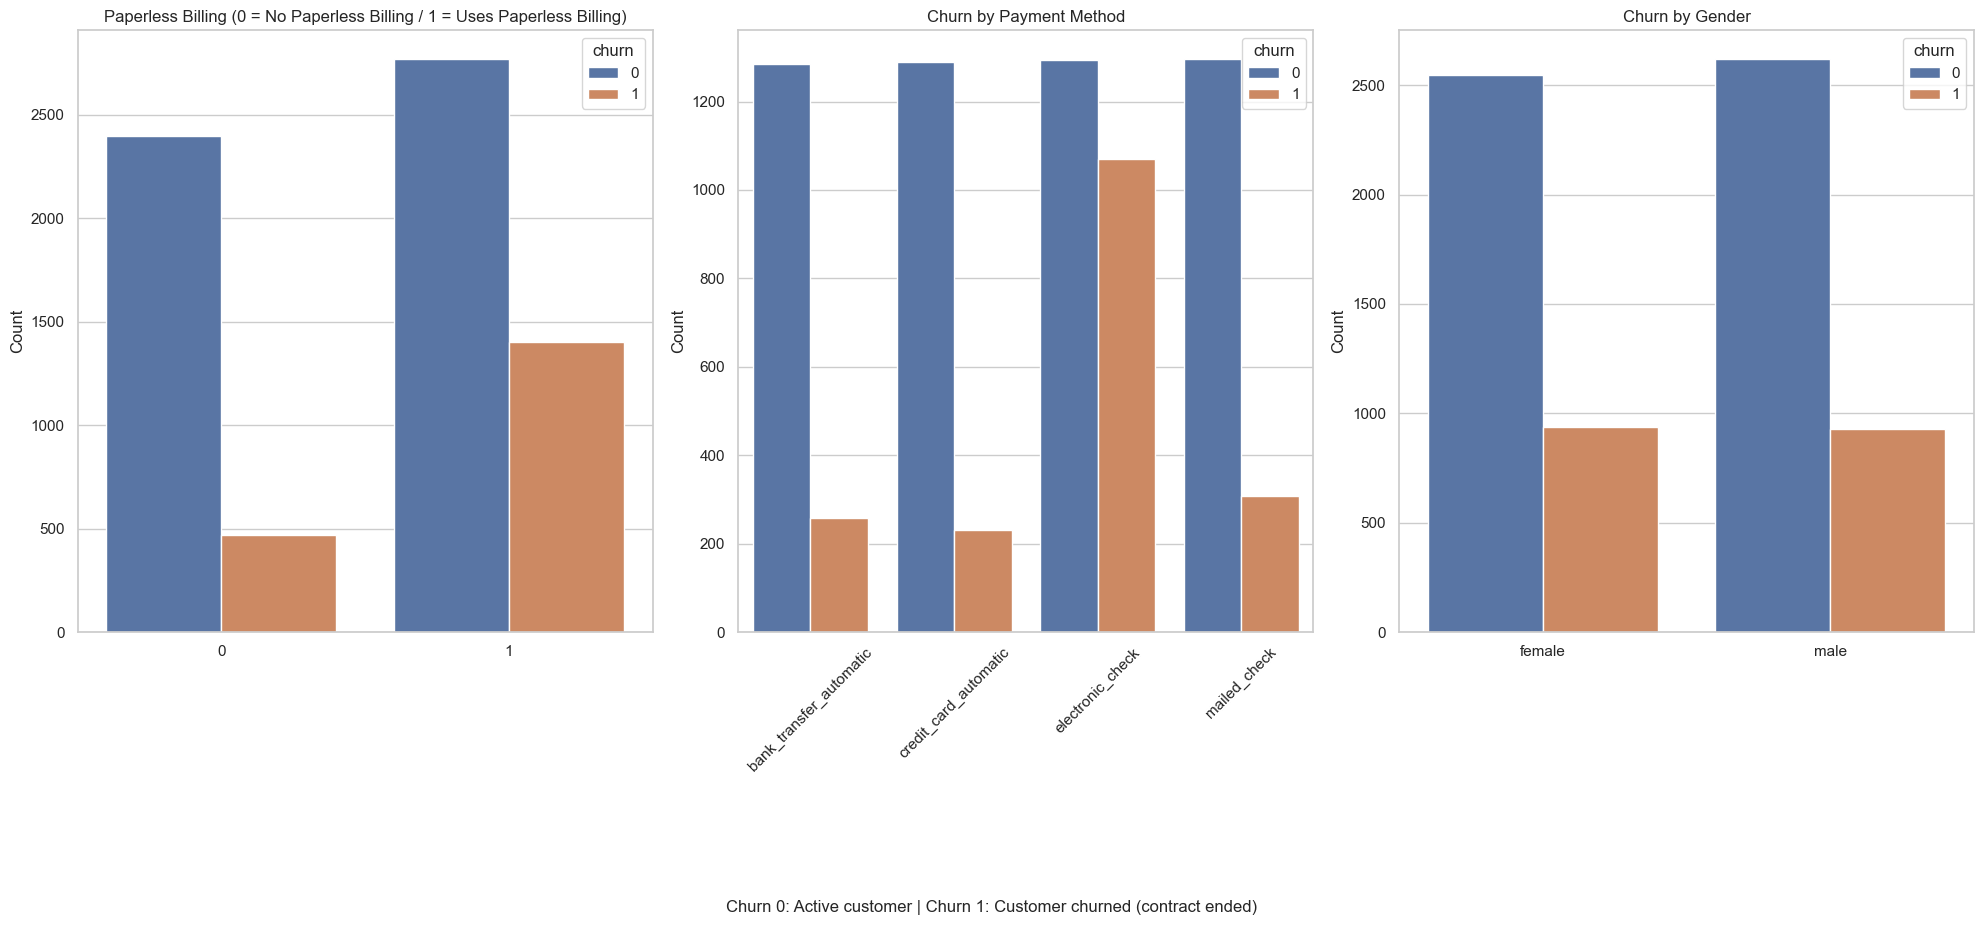

In [72]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 8))

sns.countplot(hue = 'churn', hue_order = [0, 1], x='paperless_billing', data=df, ax=ax1)
ax1.set_ylabel("Count")
ax1.set_xlabel("")
ax1.set_title("Paperless Billing (0 = No Paperless Billing / 1 = Uses Paperless Billing)")

sns.countplot(hue = 'churn', hue_order = [0, 1], x='payment_method', data=df, ax=ax2)
ax2.set_ylabel("Count")
ax2.set_xlabel("")
ax2.set_title("Churn by Payment Method")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)

sns.countplot(hue = 'churn', hue_order = [0, 1], x='gender', data=df, ax=ax3)
ax3.set_ylabel("Count")
ax3.set_xlabel("")
ax3.set_title("Churn by Gender")

plt.figtext(0.5, -0.15, "Churn 0: Active customer | Churn 1: Customer churned (contract ended)", ha="center", fontsize=12);
plt.tight_layout()

It is noticeable that most customers who use paperless billing tend to churn more frequently compared to those who do not use this option. Regarding payment methods, "electronic check" stands out as having the highest churn rate, while other methods, such as automatic payments via credit card or bank transfer, show lower churn rates. The analysis by gender reveals no significant difference in churn rates between males and females.

<br>

##### Charges:

The chart below presents a comparative visual analysis of monthly charges and the average charge per contract day between active customers and those who churned. The boxplots show the distribution of these values for both customer groups.

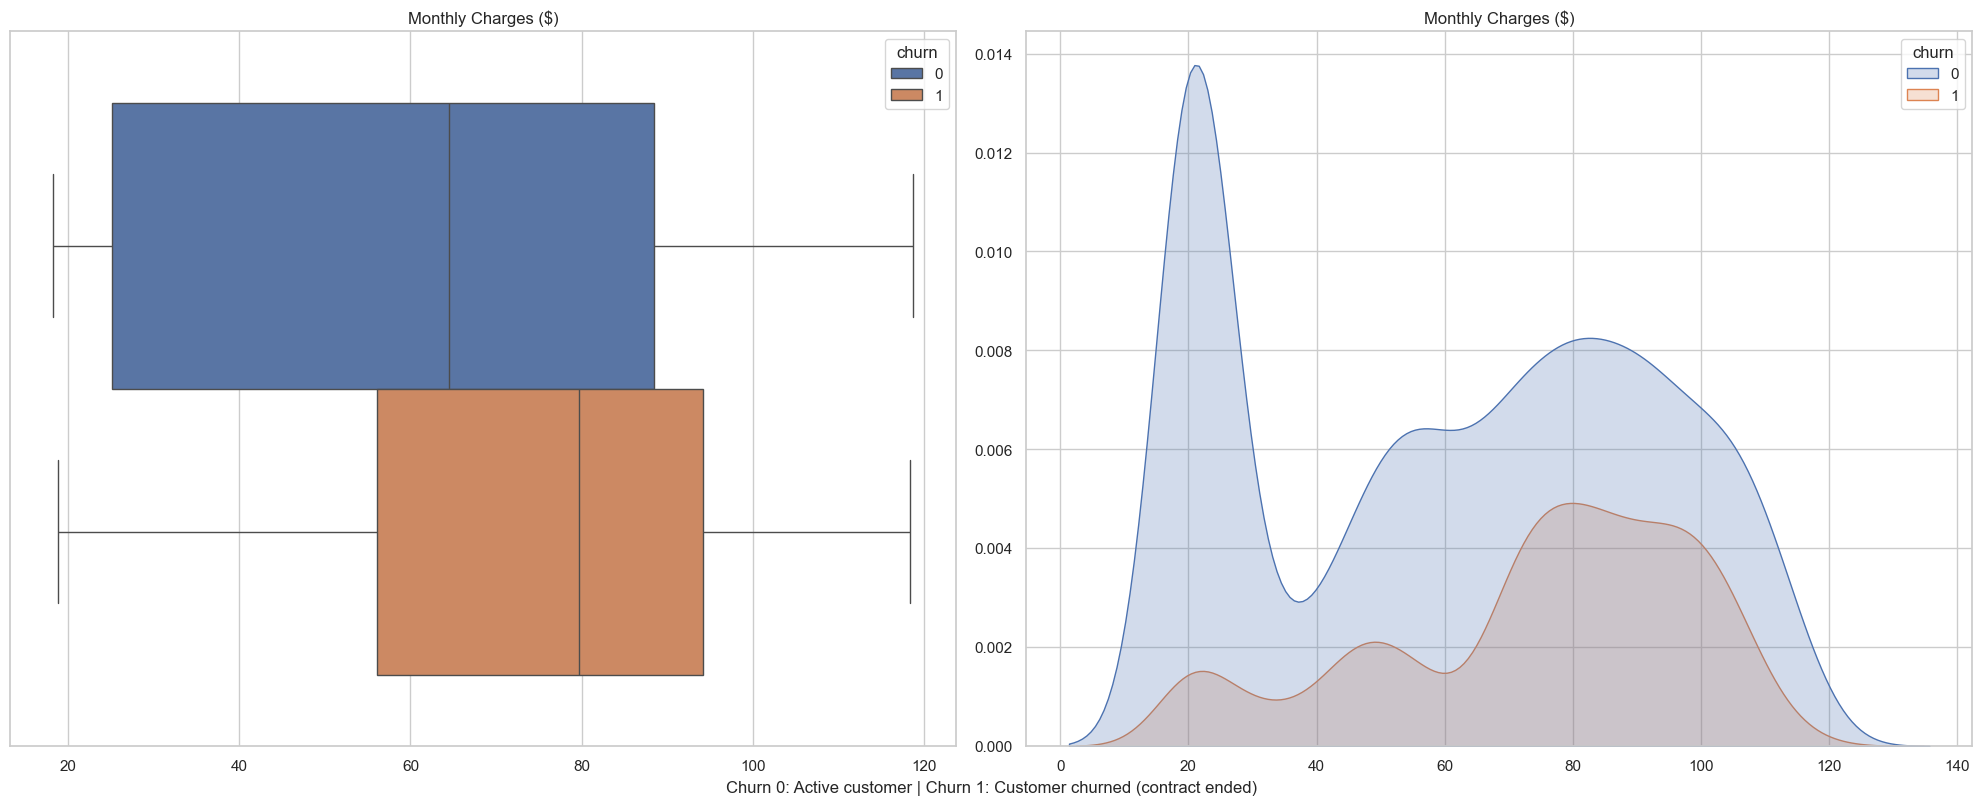

In [73]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20, 8))

sns.boxplot( hue = 'churn', hue_order = [0, 1], x = 'monthly_charges', data = df, ax = ax1)
ax1.set_ylabel("")
ax1.set_xlabel("")
ax1.set_title("Monthly Charges ($)")

sns.kdeplot( hue = 'churn', hue_order = [0, 1], x = 'monthly_charges', fill= True, data = df, ax = ax2)
ax2.set_ylabel("")
ax2.set_xlabel("")
ax2.set_title("Monthly Charges ($)")

plt.figtext(0.5, -0.001, "Churn 0: Active customer | Churn 1: Customer churned (contract ended)", ha="center", fontsize=12);
plt.tight_layout()

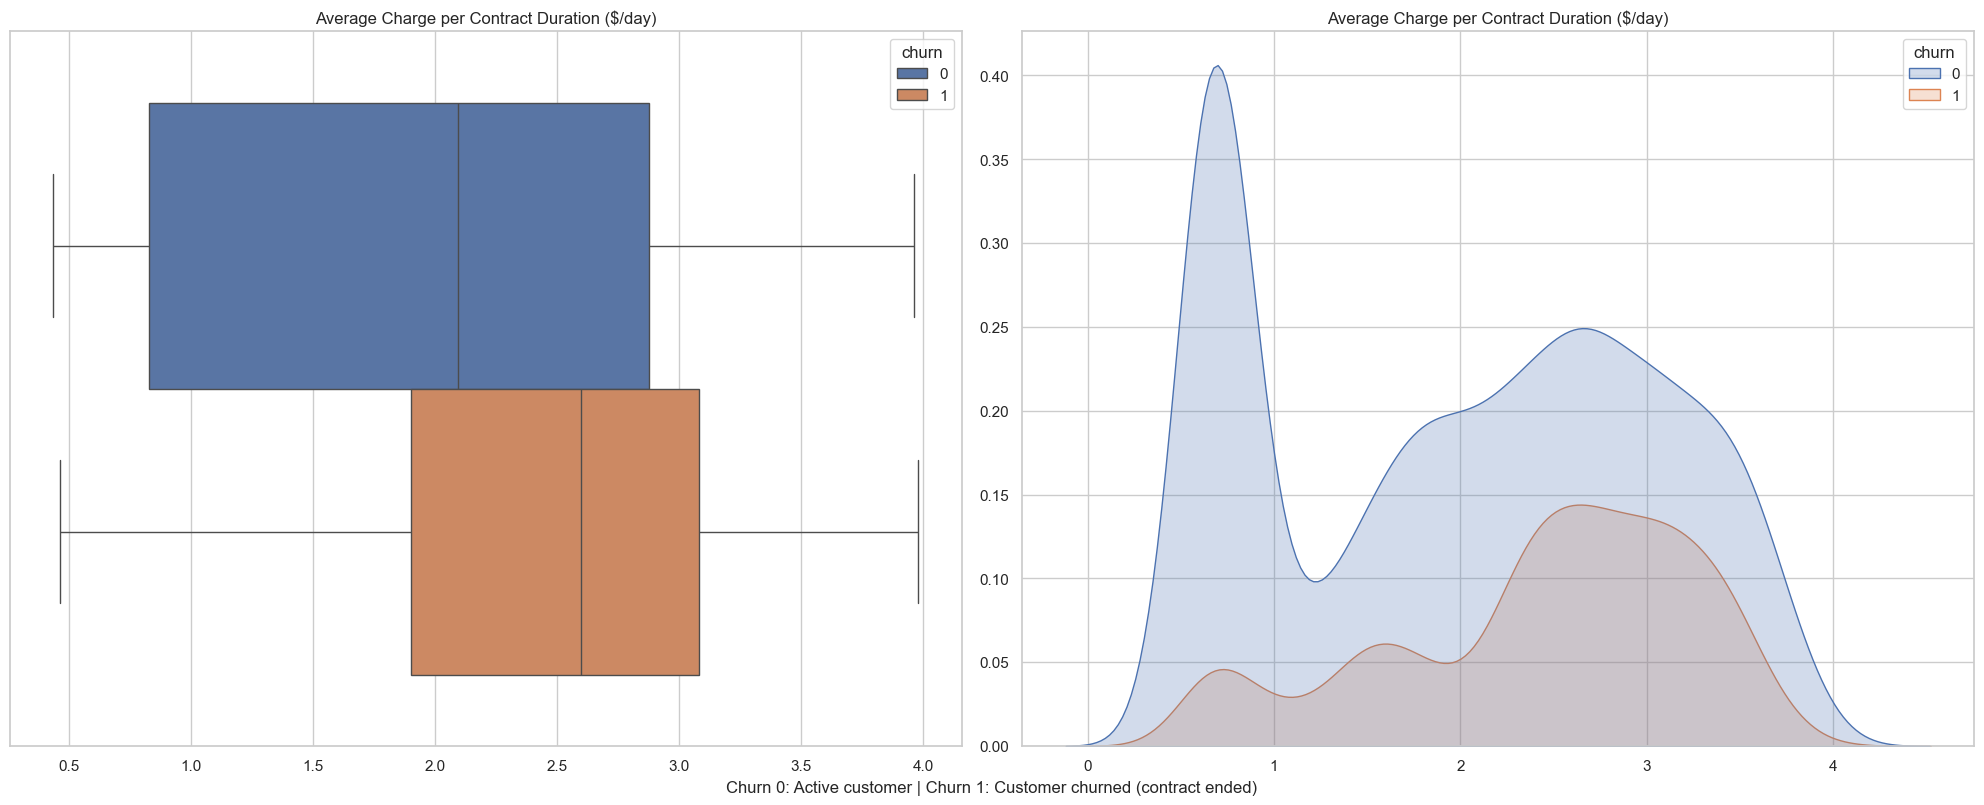

In [74]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20, 8))

sns.boxplot( hue = 'churn', hue_order = [0, 1], x = 'avg_charge_per_duration', data = df, ax = ax1)
ax1.set_ylabel("")
ax1.set_xlabel("")
ax1.set_title("Average Charge per Contract Duration ($/day)")

sns.kdeplot( hue = 'churn', hue_order = [0, 1], x = 'avg_charge_per_duration', fill= True, data = df, ax = ax2)
ax2.set_ylabel("")
ax2.set_xlabel("")
ax2.set_title("Average Charge per Contract Duration ($/day)")

plt.figtext(0.5, -0.001, "Churn 0: Active customer | Churn 1: Customer churned (contract ended)", ha="center", fontsize=12);
plt.tight_layout()

Analyzing the monthly charges boxplot and KDE plot, we can observe that customers who churned (churn 1) tend to have slightly higher monthly charges compared to those who remained (churn 0). The median for churned customers is concentrated at higher values. In the average charge per contract day graphs, as expected, a similar pattern is observed, where customers who canceled their contracts pay, on average, higher amounts per day.

<br>

#### Churn by Senior Citizen, Partner and Dependents:

The following chart shows the churn relationship across three distinct customer groups: senior citizens, customers with partners, and customers with dependents. Each graph compares the number of customers who remained active (churn 0) with those who canceled the service (churn 1) within each category.

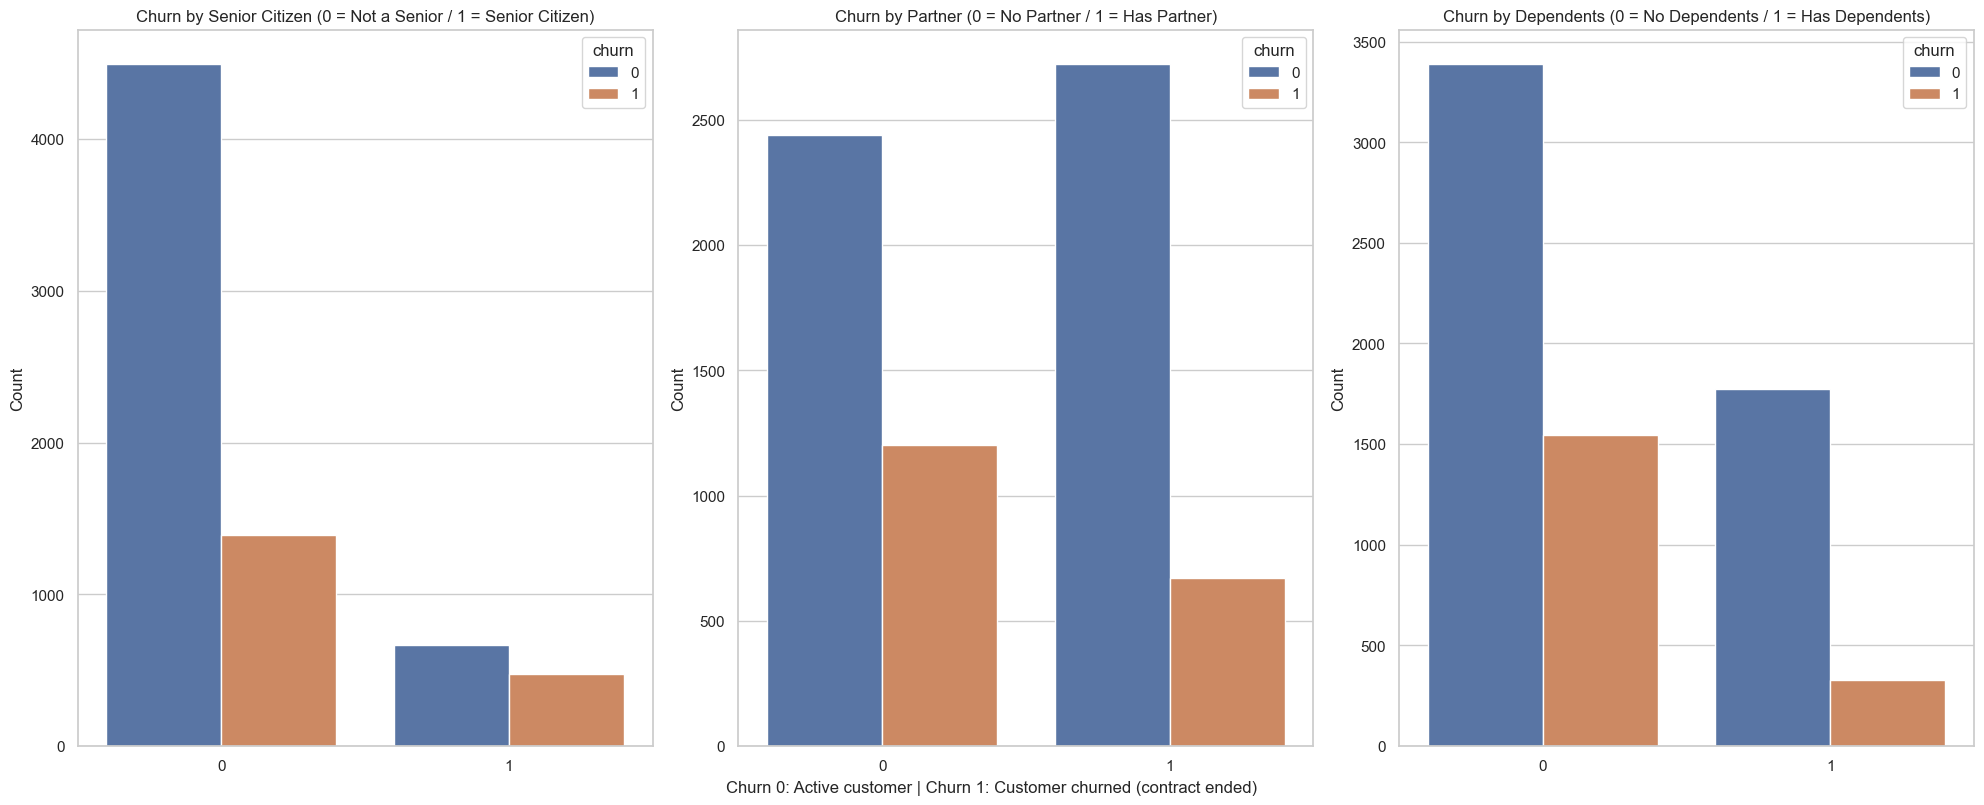

In [75]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 8))

sns.countplot(hue = 'churn', hue_order = [0, 1], x='senior_citizen', data=df, ax=ax1)
ax1.set_ylabel("Count")
ax1.set_xlabel("")
ax1.set_title("Churn by Senior Citizen (0 = Not a Senior / 1 = Senior Citizen)")

sns.countplot(hue = 'churn', hue_order = [0, 1], x='partner', data=df, ax=ax2)
ax2.set_ylabel("Count")
ax2.set_xlabel("")
ax2.set_title("Churn by Partner (0 = No Partner / 1 = Has Partner)")

sns.countplot(hue = 'churn', hue_order = [0, 1], x='dependents', data=df, ax=ax3)
ax3.set_ylabel("Count")
ax3.set_xlabel("")
ax3.set_title("Churn by Dependents (0 = No Dependents / 1 = Has Dependents)")

plt.figtext(0.5, -0.001, "Churn 0: Active customer | Churn 1: Customer churned (contract ended)", ha="center", fontsize=12);
plt.tight_layout()

In the graphs, we can observe that senior citizens have a higher proportion of cancellations compared to non-senior customers, indicating a potential vulnerability of this group to churn. Similarly, customers without partners show a higher tendency to cancel the service compared to those with partners. In the dependents' chart, it is evident that customers without dependents have a higher churn rate than those with dependents, suggesting that family responsibilities may influence retention.

<br>

#### Phone and Internet Services:

The chart below provides a visual analysis of churn, comparing phone service, the presence of multiple lines, and internet service. Each graph is segmented by customers who keep the service (churn 0) and those who canceled (churn 1). It is important to note that the multiple lines chart only includes customers who have phone service.

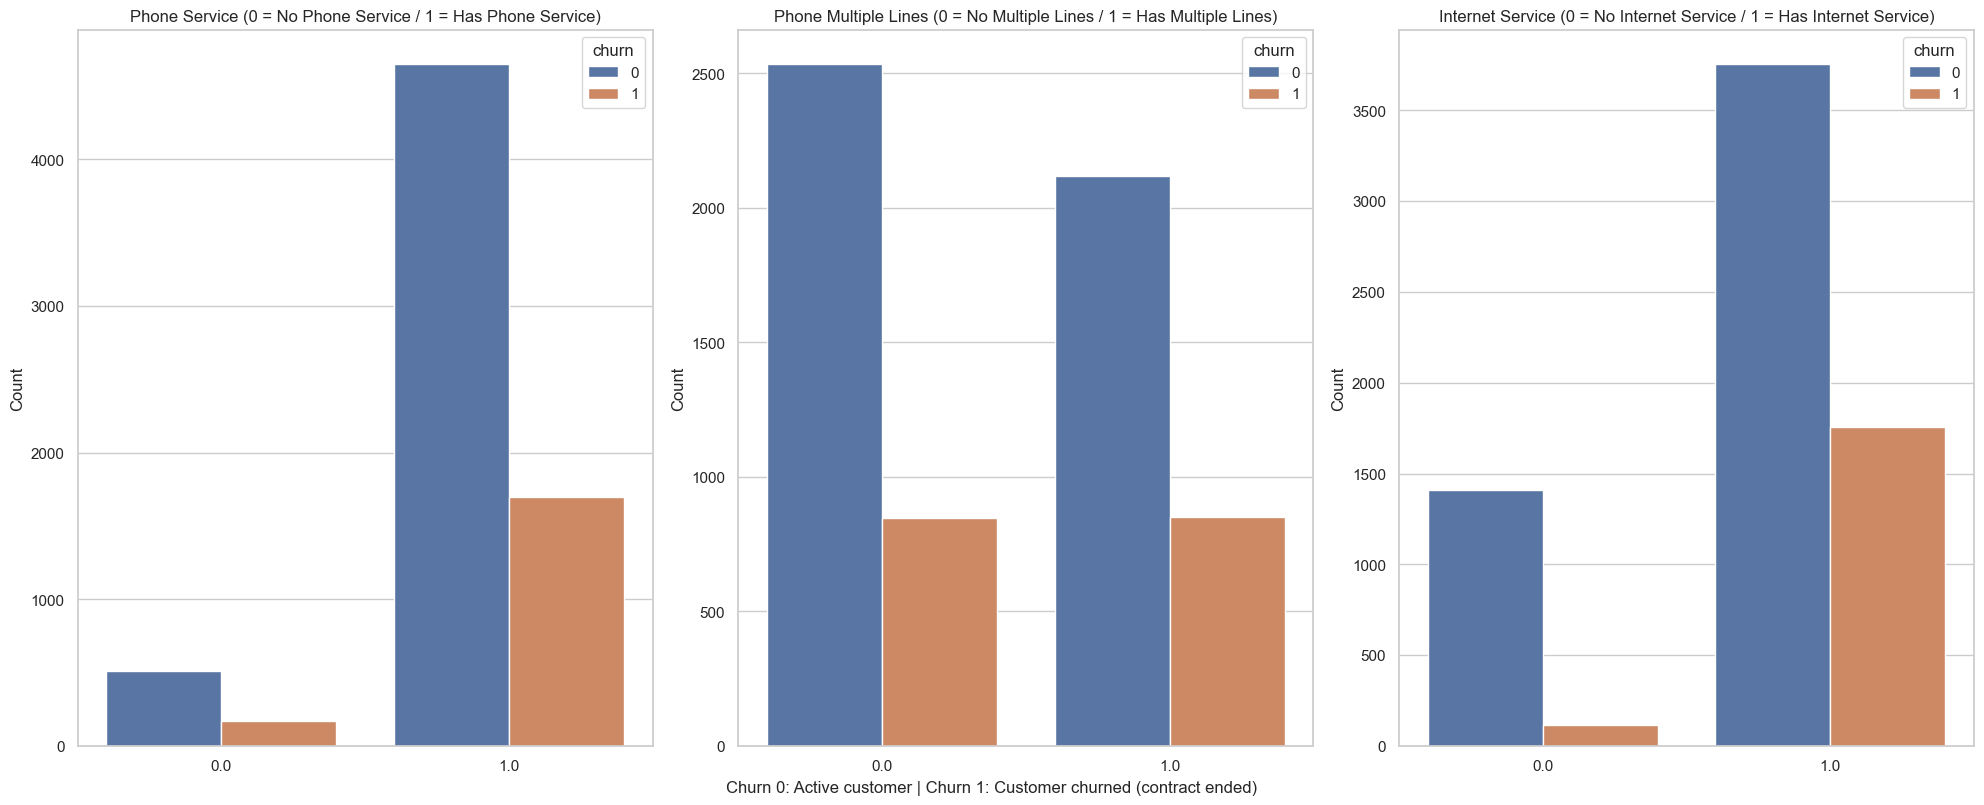

In [76]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 8))

sns.countplot(hue='churn', hue_order=[0, 1], x='phone', data=df, ax=ax1)
ax1.set_ylabel("Count")
ax1.set_xlabel("")
ax1.set_title("Phone Service (0 = No Phone Service / 1 = Has Phone Service)")

df_with_phone = df[df['phone'] == 1]
sns.countplot(hue='churn', hue_order=[0, 1], x='multiple_lines', data=df_with_phone, ax=ax2)
ax2.set_ylabel("Count")
ax2.set_xlabel("")
ax2.set_title("Phone Multiple Lines (0 = No Multiple Lines / 1 = Has Multiple Lines)")

sns.countplot(hue='churn', hue_order=[0, 1], x='internet', data=df, ax=ax3)
ax3.set_ylabel("Count")
ax3.set_xlabel("")
ax3.set_title("Internet Service (0 = No Internet Service / 1 = Has Internet Service)")

plt.figtext(0.5, -0.001, "Churn 0: Active customer | Churn 1: Customer churned (contract ended)", ha="center", fontsize=12);
plt.tight_layout()

We can observe that in phone service, most customers remain active, but there is a significant number of cancellations among those with phone service. For multiple lines, the cancellation rate is noticeably higher among customers with multiple lines, suggesting that having multiple lines may be associated with a higher churn rate. In internet service, the proportion of cancellations among customers with internet is also significant, indicating a direct relationship between the type of service subscribed and churn behavior. It is worth mentioning that for the multiple lines and internet service charts, the 0 values may include customers who do not have the respective service.

<br>

The charts below compare churn rates among customers with different types of internet services (DSL, fiber optic) and between customers with and without online security and backup services. Each chart is segmented by customers who remain active (churn 0) and those who have churned (churn 1), providing a visual analysis of the relationship between subscribing to these services and the likelihood of churn.

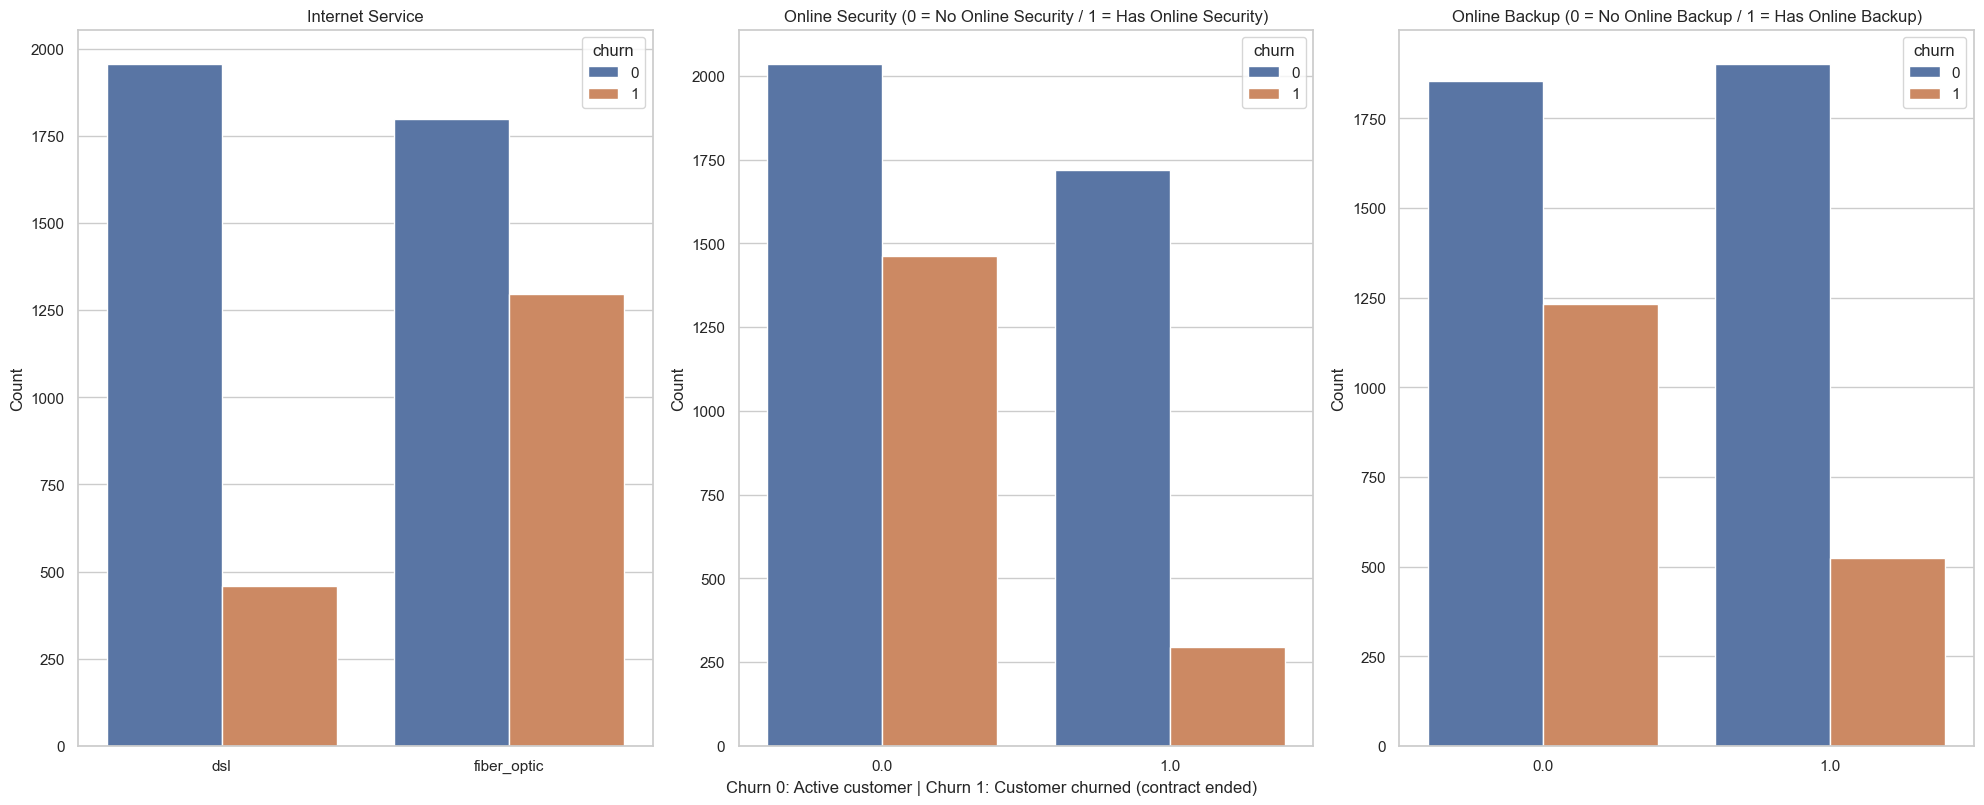

In [77]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 8))

df_with_internet = df[df['internet'] == 1]
df_with_internet_filtered = df_with_internet[df_with_internet['internet_service'] != 'no_internet']
df_with_internet_filtered['internet_service'] = df_with_internet_filtered['internet_service'].cat.remove_unused_categories()

sns.countplot(hue = 'churn', hue_order = [0, 1], x='internet_service', data=df_with_internet_filtered, ax=ax1)
ax1.set_ylabel("Count")
ax1.set_xlabel("")
ax1.set_title("Internet Service")

sns.countplot(hue = 'churn', hue_order = [0, 1], x='online_security', data=df_with_internet, ax=ax2)
ax2.set_ylabel("Count")
ax2.set_xlabel("")
ax2.set_title("Online Security (0 = No Online Security / 1 = Has Online Security)")

sns.countplot(hue = 'churn', hue_order = [0, 1], x='online_backup', data=df_with_internet, ax=ax3)
ax3.set_ylabel("Count")
ax3.set_xlabel("")
ax3.set_title("Online Backup (0 = No Online Backup / 1 = Has Online Backup)")

plt.figtext(0.5, -0.001, "Churn 0: Active customer | Churn 1: Customer churned (contract ended)", ha="center", fontsize=12);
plt.tight_layout()

In the internet services chart, most customers with DSL or fiber optic services remain active, but a higher proportion of fiber optic customers seem to be churning compared to DSL customers. Regarding online security and backup services, there is a higher churn tendency among those who did not subscribe to these services.

<br>

The charts below show the relationship between churn and additional services offered, such as device protection, tech support, streaming TV, and streaming movies.

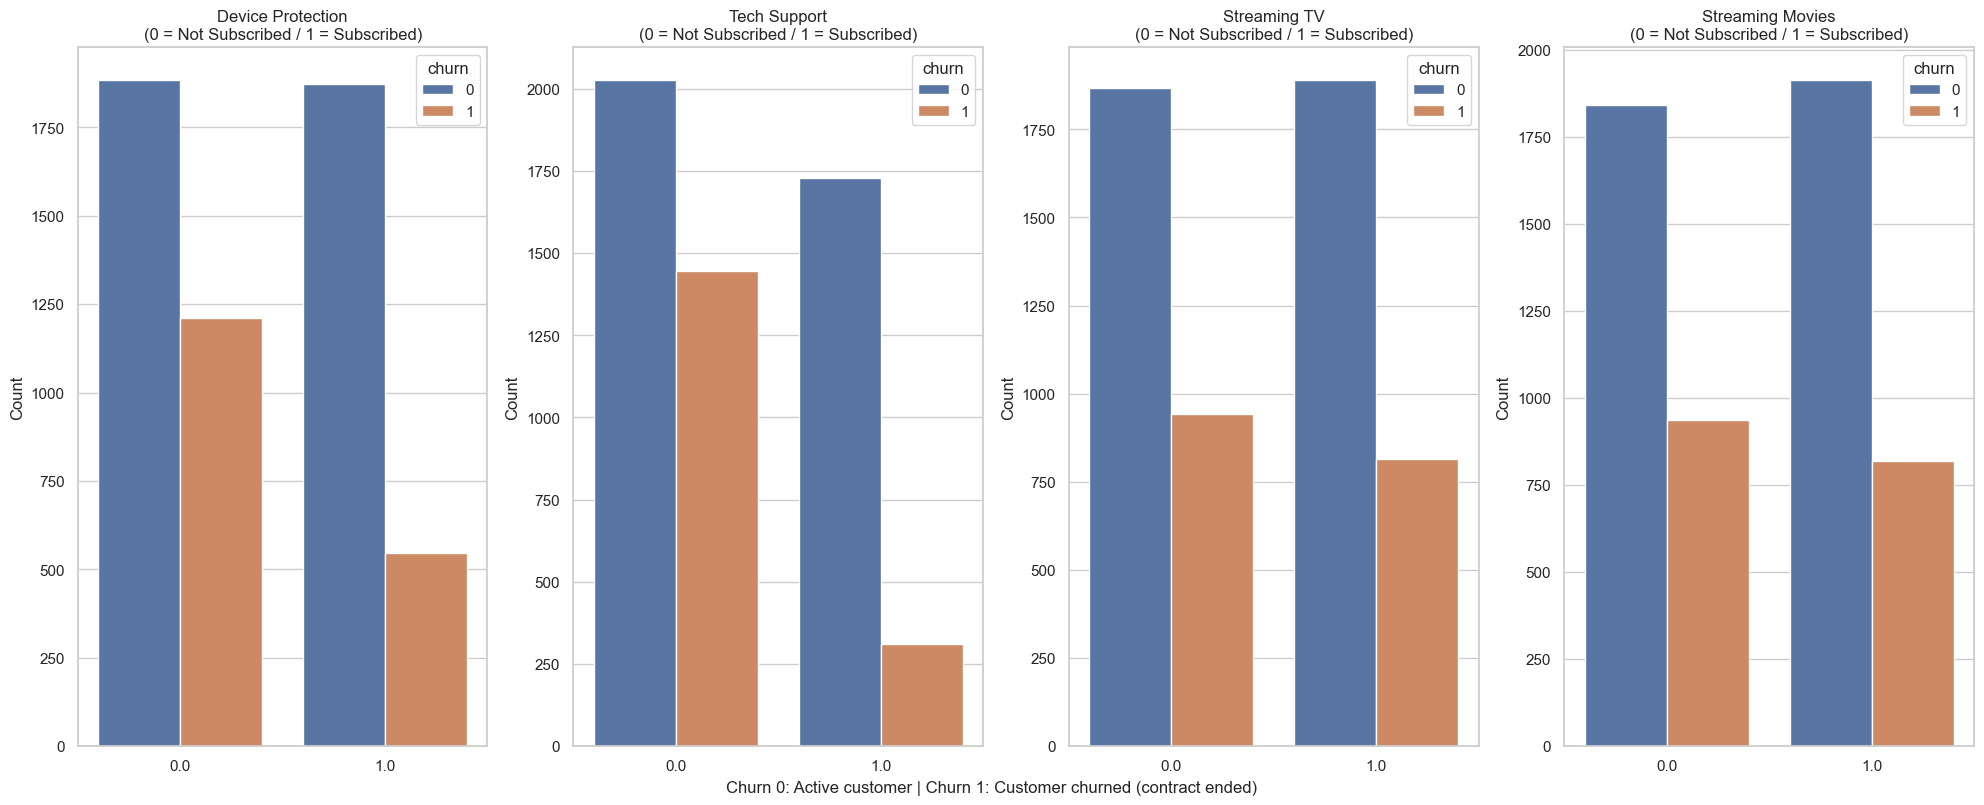

In [78]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20, 8))

sns.countplot(hue = 'churn', hue_order = [0, 1], x='device_protection', data=df_with_internet, ax=ax1)
ax1.set_ylabel("Count")
ax1.set_xlabel("")
ax1.set_title("Device Protection\n(0 = Not Subscribed / 1 = Subscribed)")

sns.countplot(hue = 'churn', hue_order = [0, 1], x='tech_support', data=df_with_internet, ax=ax2)
ax2.set_ylabel("Count")
ax2.set_xlabel("")
ax2.set_title("Tech Support\n(0 = Not Subscribed / 1 = Subscribed)")

sns.countplot(hue = 'churn', hue_order = [0, 1], x='streaming_tv', data=df_with_internet, ax=ax3)
ax3.set_ylabel("Count")
ax3.set_xlabel("")
ax3.set_title("Streaming TV\n(0 = Not Subscribed / 1 = Subscribed)")

sns.countplot(hue = 'churn', hue_order = [0, 1], x='streaming_movies', data=df_with_internet, ax=ax4)
ax4.set_ylabel("Count")
ax4.set_xlabel("")
ax4.set_title("Streaming Movies\n(0 = Not Subscribed / 1 = Subscribed)")

plt.figtext(0.5, -0.001, "Churn 0: Active customer | Churn 1: Customer churned (contract ended)", ha="center", fontsize=12);
plt.tight_layout()

We can observe that customers who did not subscribe to additional services like device protection, tech support, and streaming services tend to churn more often than those who did. Device protection and tech support, in particular, seem to be associated with higher customer retention.

<br>

#### 5.1 EDA Insights

The exploratory data analysis (EDA) revealed important insights for customer retention, highlighting strategic actions that can be implemented to reduce churn and improve loyalty outcomes. Understanding the key factors behind contract cancellations allows companies to anticipate customer needs and adjust their service policies and offerings. Below are the main recommendations based on the analyzed data, which can help significantly reduce cancellations and increase customer satisfaction.

Key Points:

1. Offer differentiated support during the first 300 days (or first year) of the contract: It was observed that half of all cancellations occur within the first 300 days of the contract. Therefore, it is essential for the company to offer proactive and differentiated support during this critical period. Onboarding programs, regular check-ins, and offers of specialized technical support can help customers feel more secure and satisfied, reducing the risk of cancellation.

2. Create strategies to discourage "month-to-month" contracts and "electronic check" payments: Month-to-month contracts and the "electronic check" payment method were associated with higher cancellation rates. To mitigate this risk, it is advisable to create incentives that encourage customers to opt for long-term contracts, such as discounts or additional benefits, while discouraging the use of payment methods correlated with churn by offering more attractive alternatives like automatic credit card payments or automatic bank transfers.

3. Encourage the use of paper billing over paperless billing for at-risk customers: The analysis suggests that customers who opt for paperless billing tend to cancel more frequently. Therefore, it may be beneficial to incentivize the use of paper billing, particularly for customers who are at a higher risk of churn. However, before discouraging paperless billing altogether, it is essential to investigate the reasons behind this trend. It could be related to issues with communication, a lack of reminders, or customers feeling disconnected from the company. By improving the overall digital billing experience—such as by providing clear and timely communication, automated payment reminders, and greater transparency in digital invoices—the company could retain more customers who prefer the convenience of paperless billing while encouraging those who may need more traditional options to switch to paper billing.

4. Adjust the initial contract payment amounts to match those of customers who did not cancel: The analysis revealed that customers who cancel tend to pay higher amounts in the early months. An effective strategy would be to create plans that balance monthly costs more evenly, providing a payment experience similar to that of customers who remain loyal. This can reduce dissatisfaction with high initial charges.

5. Encourage the acquisition of customers with dependents by investing in marketing: It was identified that customers with dependents are less likely to cancel their contracts. Investing in marketing campaigns targeted at this segment can increase the acquisition of customers with this profile, strengthening the base of more stable and loyal users.

6. Investigate the reasons behind cancellations associated with fiber optic technology: Although fiber optic is the most advanced internet technology, the data shows a concentration of cancellations among users of this service. It is crucial to investigate the reasons behind this trend, whether related to service quality, technical support, or specific product issues, in order to adjust offers and strategies to retain these customers.

7. Promote internet security and support plans: Customers who have additional security and technical support packages tend to show lower cancellation rates. Therefore, it is recommended to encourage subscription to these plans, either through promotional packages or bundled offers, enhancing the perceived value for the customer and ensuring a more secure experience in continuing with the service.

By implementing these actions, the company can create a more favorable environment for customer retention, directly addressing the identified critical points and promoting a more positive and satisfying experience. This will result in greater stability of the customer base, strengthening long-term relationships, and contributing to the company's sustainable growth.

<br>

## 6.0 ML Preprocessing 

In [79]:
from functions import encode_columns as encoder

In [80]:
df.head(3)

,customer_id,contract_duration,type,paperless_billing,payment_method,monthly_charges,total_charges,avg_charge_per_duration,gender,senior_citizen,partner,dependents,phone,multiple_lines,internet,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,churn
0,7590_vhveg,32,month_to_month,1,electronic_check,29.85,29.85,0.932813,female,0,1,0,0.0,0.0,1.0,dsl,0.0,1.0,0.0,0.0,0.0,0.0,0
1,5575_gnvde,1037,one_year,0,mailed_check,56.95,1889.50,1.822083,male,0,0,0,1.0,0.0,1.0,dsl,1.0,0.0,1.0,0.0,0.0,0.0,0
2,3668_qpybk,61,month_to_month,1,mailed_check,53.85,108.15,1.772951,male,0,0,0,1.0,0.0,1.0,dsl,1.0,1.0,0.0,0.0,0.0,0.0,1


In [81]:
df_ml = df.drop(columns=['customer_id', 'contract_duration', 'total_charges', 'avg_charge_per_duration', 'gender'])

In [82]:
# Enconding:

df_ml = encoder.encode_columns(df_ml, ohe_columns=['type', 'payment_method', 'internet_service'], label_columns=None)

In [83]:
# Normalization:

numeric_columns = ['monthly_charges']

scaler = MinMaxScaler()

df_ml[numeric_columns] = scaler.fit_transform(df_ml[numeric_columns])

In [84]:
df_ml.head(3)

,paperless_billing,monthly_charges,senior_citizen,partner,dependents,phone,multiple_lines,internet,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,churn,type_one_year,type_two_year,payment_method_credit_card_automatic,payment_method_electronic_check,payment_method_mailed_check,internet_service_fiber_optic,internet_service_no_internet
0,1,0.115423,0,1,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0,False,False,False,True,False,False,False
1,0,0.385075,0,0,0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0,True,False,False,False,True,False,False
2,1,0.354229,0,0,0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1,False,False,False,False,True,False,False


In [85]:
# Splitting data (70/15/15):

X = df_ml.drop(columns=['churn'])
y = df_ml['churn']

X_train, X_val_test, y_train, y_val_test = train_test_split(X, y, test_size=0.30, random_state=54321)

X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.50, random_state=54321)

In [86]:
# Class balancing

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

<br>

## 7.0 Model Evaluation and Comparison

In [87]:
from functions import evaluate_classification_model as evaluater

#### 7.1 Baseline Model

          train  val/test
Accuracy   0.50      0.71
F1 Score   0.67      0.46
APS        0.50      0.29
ROC AUC    0.50      0.50


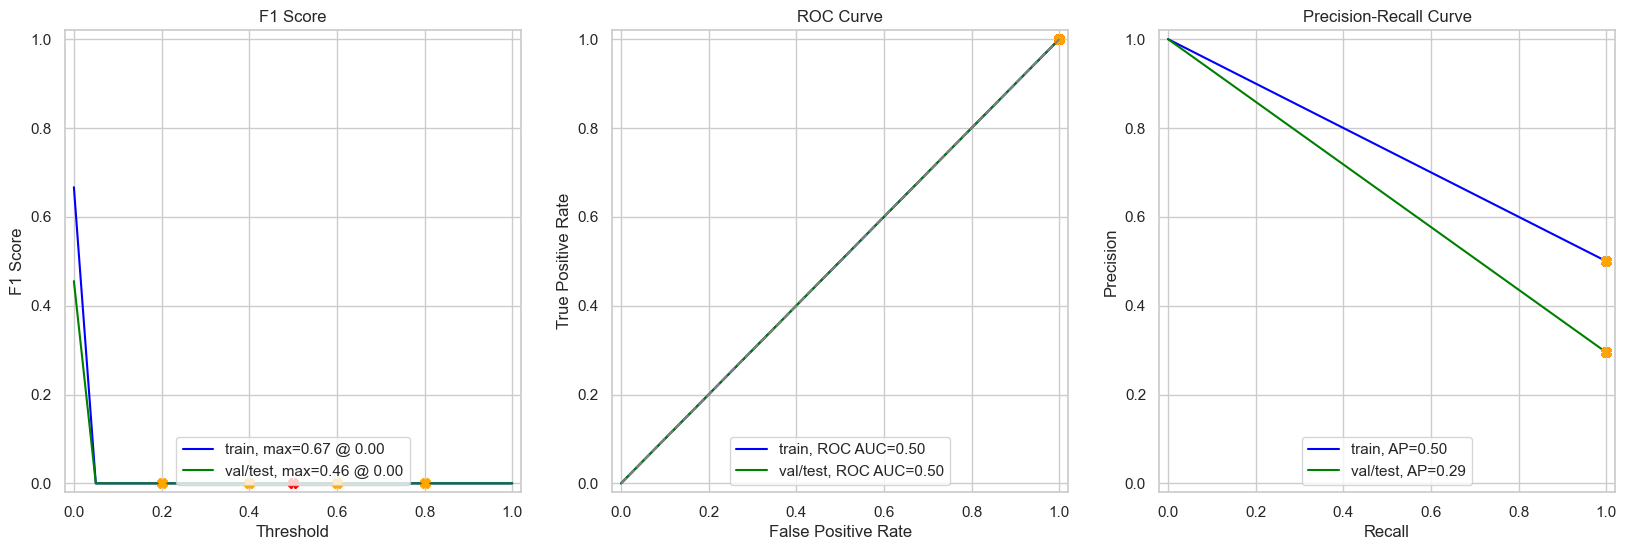

In [88]:
baseline_model = DummyClassifier(strategy='most_frequent', random_state=54321)
baseline_model.fit(X_train_smote, y_train_smote)

evaluater.evaluate_classification_model(baseline_model, X_train_smote, y_train_smote, X_val, y_val)

#### 7.2 Logistic Regression

          train  val/test
Accuracy   0.76      0.72
F1 Score   0.79      0.62
APS        0.81      0.61
ROC AUC    0.84      0.80


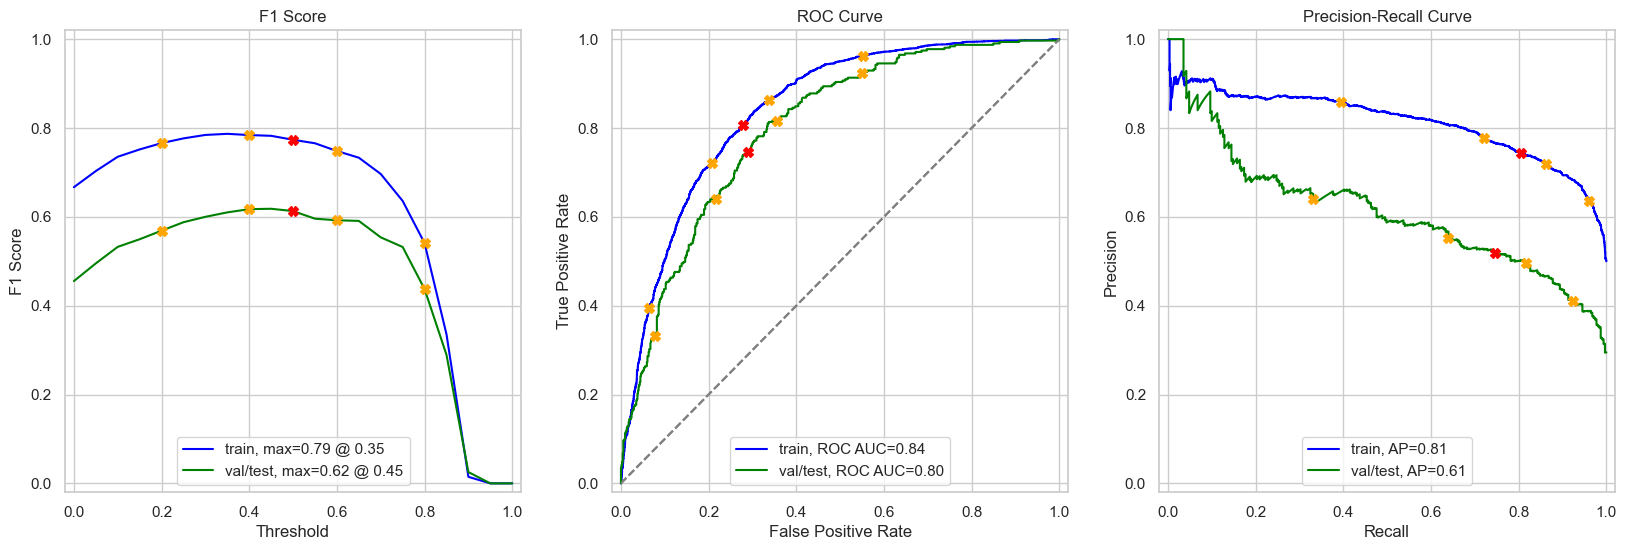

In [89]:
log_model = LogisticRegression(random_state=42, max_iter=1000)
log_model.fit(X_train_smote, y_train_smote)

evaluater.evaluate_classification_model(log_model, X_train_smote, y_train_smote, X_val, y_val)

#### 7.3 Random Forest Classifier

          train  val/test
Accuracy   0.99      0.73
F1 Score   0.99      0.56
APS        1.00      0.52
ROC AUC    1.00      0.75


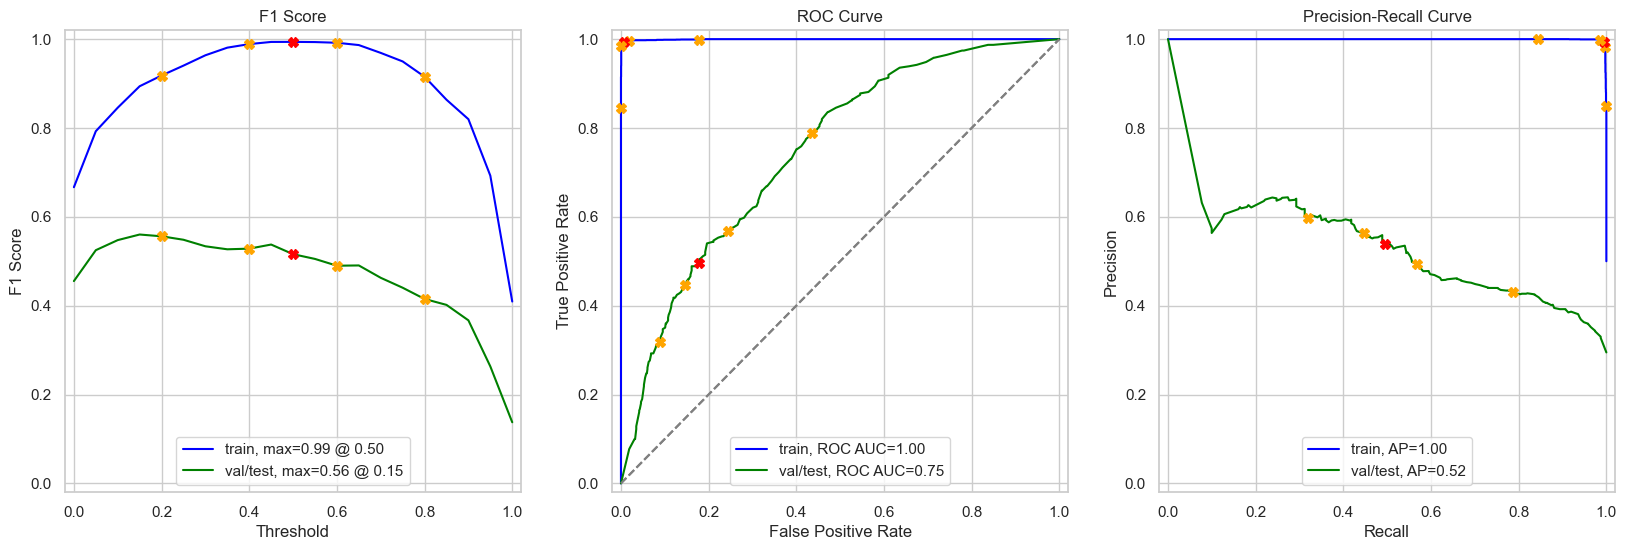

In [90]:
rf_model = RandomForestClassifier(random_state=54321)
rf_model.fit(X_train_smote, y_train_smote)

evaluater.evaluate_classification_model(rf_model, X_train_smote, y_train_smote, X_val, y_val)

#### 7.4 LightGBM Classifier

[LightGBM] [Info] Number of positive: 3641, number of negative: 3641
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002752 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 637
[LightGBM] [Info] Number of data points in the train set: 7282, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
          train  val/test
Accuracy   0.87      0.75
F1 Score   0.87      0.60
APS        0.94      0.60
ROC AUC    0.94      0.80


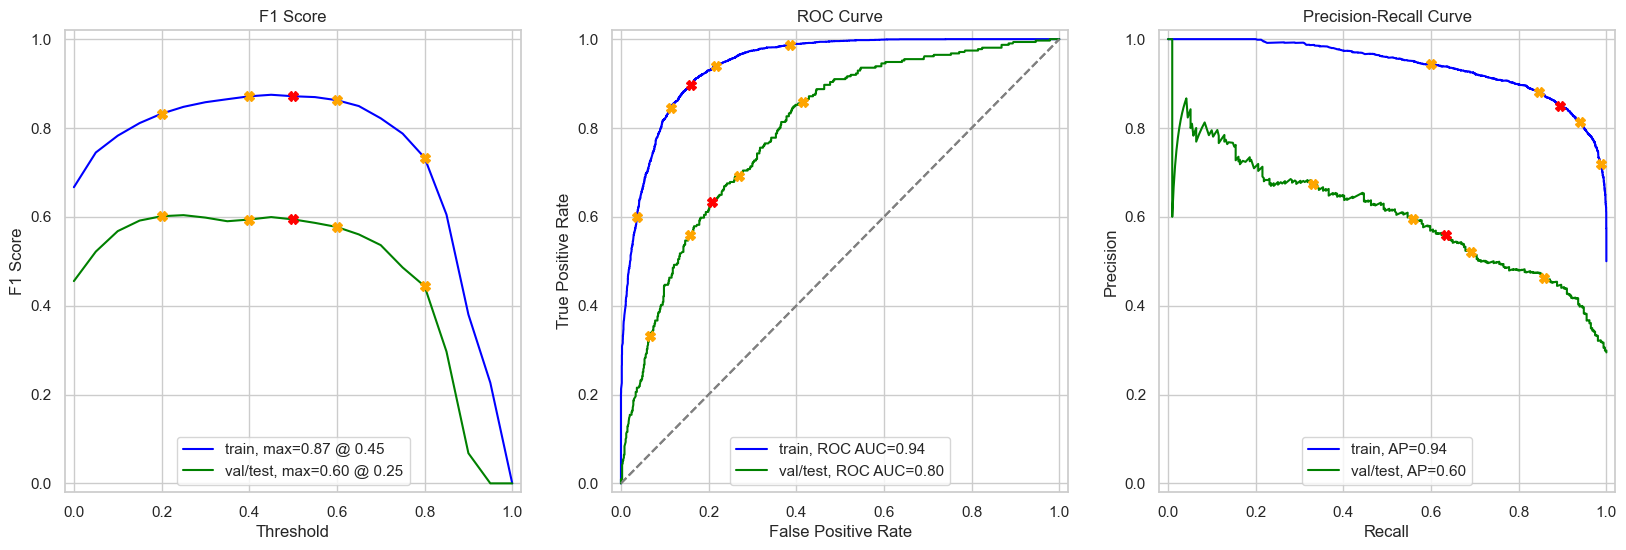

In [91]:
lgb_model = LGBMClassifier(random_state=54321)
lgb_model.fit(X_train_smote, y_train_smote)

evaluater.evaluate_classification_model(lgb_model, X_train_smote, y_train_smote, X_val, y_val)

In [92]:
print(lgb_model.get_params())

{'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 1.0, 'importance_type': 'split', 'learning_rate': 0.1, 'max_depth': -1, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 100, 'n_jobs': None, 'num_leaves': 31, 'objective': None, 'random_state': 54321, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'subsample': 1.0, 'subsample_for_bin': 200000, 'subsample_freq': 0}


#### 7.5 XGBoost Classifier

          train  val/test
Accuracy   0.90      0.75
F1 Score   0.90      0.61
APS        0.96      0.59
ROC AUC    0.97      0.79


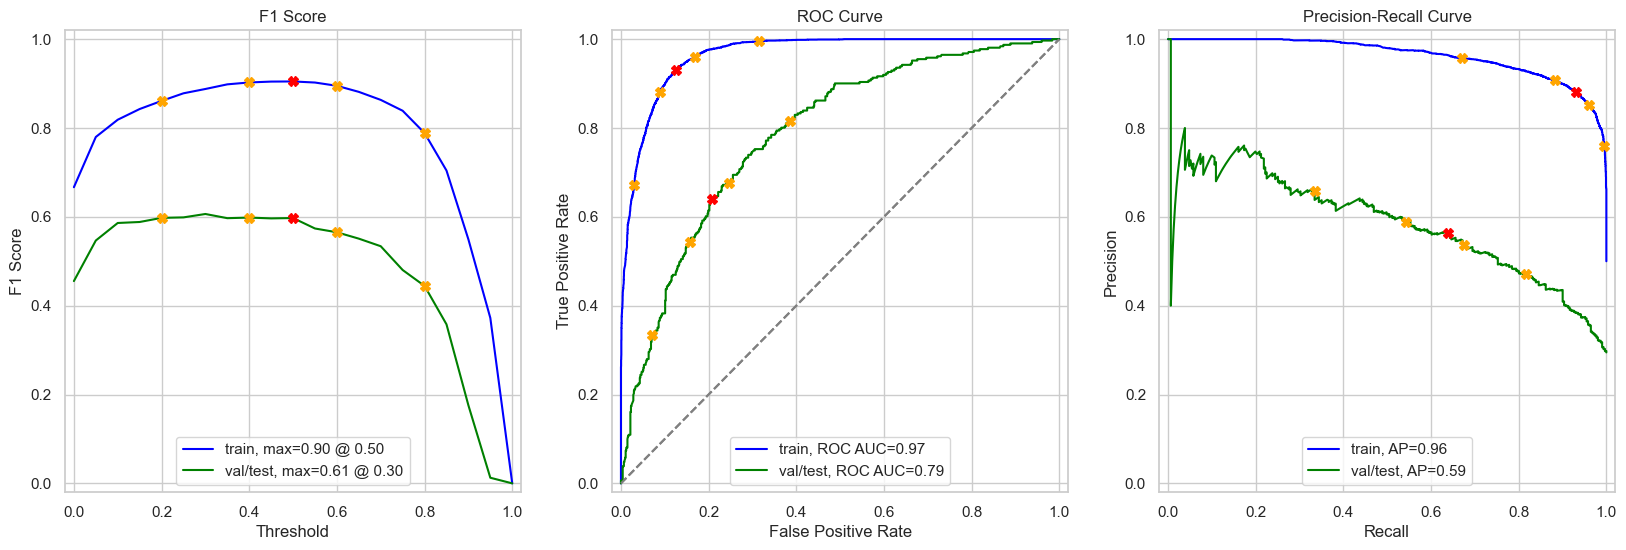

In [93]:
xgb_model = xgb.XGBClassifier(random_state=54321)
xgb_model.fit(X_train_smote, y_train_smote)

evaluater.evaluate_classification_model(xgb_model, X_train_smote, y_train_smote, X_val, y_val)

<br>

## 7.0 Chosen Model (LightGBM)

The LightGBM model performs very well on the training set but loses some of its effectiveness on the validation/test set. 

The results suggest that the model may be overfitting the training data, meaning it has learned the specific details of the training set very well, but this does not translate into good performance on new data (test/validation). 

Some actions to mitigate this issue could include applying stronger regularization, increasing the amount of data, or better tuning the model's parameters (such as the number of trees or the maximum depth of the trees).

In [94]:
# lgb_model = LGBMClassifier(random_state=54321)

# param_grid = {
#     'learning_rate': [0.01, 0.05, 0.1], 
#     'n_estimators': [100, 200, 300],  
#     'num_leaves': [30, 60, 90],  
#     'max_depth': [-1, 10, 20],  
#     'min_child_samples': [20, 50, 100],  
#     'subsample': [0.6, 0.8, 1.0],  
#     'colsample_bytree': [0.6, 0.8, 1.0],  
#     'reg_alpha': [0, 0.1, 0.5],  
#     'reg_lambda': [0, 0.1, 0.5],    
# }

# grid_search = GridSearchCV(estimator=lgb_model, 
#                            param_grid=param_grid, 
#                            scoring='roc_auc',  
#                            cv=5,  
#                            verbose=1,  
#                            n_jobs=-1)  

# grid_search.fit(X_train_smote, y_train_smote)

# print("Best hyperparameters found:")
# print(grid_search.best_params_)

# best_lgb_model = grid_search.best_estimator_

# evaluater.evaluate_classification_model(best_lgb_model, X_train_smote, y_train_smote, X_val, y_val)

Best hyperparameters found:\
{'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 20, 'min_child_samples': 20, 'n_estimators': 300, 'num_leaves': 60, 'reg_alpha': 0, 'reg_lambda': 0, 'subsample': 0.6}

[LightGBM] [Info] Number of positive: 3641, number of negative: 3641
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001084 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 637
[LightGBM] [Info] Number of data points in the train set: 7282, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
          train  val/test
Accuracy   0.90      0.77
F1 Score   0.90      0.59
APS        0.96      0.60
ROC AUC    0.97      0.81


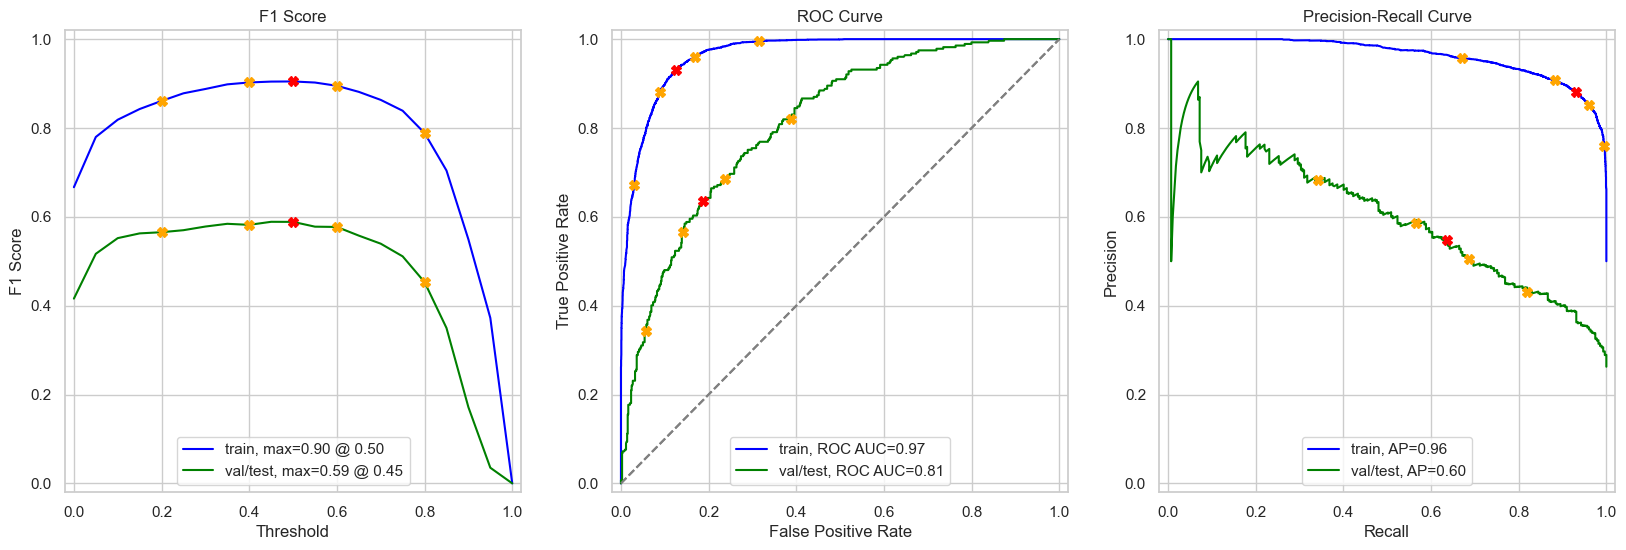

In [95]:
best_lgb_model = LGBMClassifier(
    random_state=54321, 
    colsample_bytree=0.8, 
    learning_rate=0.05, 
    max_depth=20, 
    min_child_samples=20, 
    n_estimators=300, 
    num_leaves=60, 
    reg_alpha=0, 
    reg_lambda=0, 
    subsample=0.6
)

lgb_model.fit(X_train_smote, y_train_smote)

evaluater.evaluate_classification_model(xgb_model, X_train_smote, y_train_smote, X_test, y_test)

#### 7.1 Saving Chosen Model

In [96]:
dump(best_lgb_model, 'best_lgbm_model.joblib')

['best_lgbm_model.joblib']